In [1]:
import tracemalloc
import traceback

from utils_v1 import *


In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential
from src.trainer.multioutput import TrainerMCDropout
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric
import json
import pickle 
import src.trainer.evidential as evidential
from src.backend.Logger import Logger



In [3]:
'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''

site = 'PA'
mode = 'mcd' # evidential, mcd


if mode == 'evidential':
	training = False
elif mode == 'mcd':
	training = False
print("Mode: {}. Site: {}. Training: {}".format(mode, site, training))


Mode: mcd. Site: PA. Training: False


In [4]:

if site == 'PA':
	#dates = [2018, 2019]
	dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)			

	if mode == 'evidential':
		#exp_id_base = 148
		# exp_id_base = 155
		exp_id_base = 194
		exp_id_base = 198
		exp_id_base = 214

		# earlier date
		exp_id_base = 224
		exp_id_base = 194
	elif mode == 'mcd':
		exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122]

else:
	
	dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)	
	
	if mode == 'evidential':
		# MT
		exp_id_base = 196
	elif mode == 'mcd':
		exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117]

ic(dates)

if issubclass(type(dataset), MultipleDates):
	if mode == 'evidential':
		patchesHandler = PatchesHandlerEvidential(
			dataset)
	else:
		patchesHandler = PatchesHandlerMultipleDates(
			dataset)
		
else:
	patchesHandler = PatchesHandler()



ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2018, 2019]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [5]:
# from enum import Enum
# UncertaintyMethod = Enum('Predictor', 'pred_var MI pred_entropy KL pred_entropy_single evidential')

In [6]:
config = {
    "training": training,
    "learning_rate": 1e-4,
    "weights": [0.1, 0.9, 0],
    "save_probabilities": False,
    "loadInference": False,
    "addPastDeforestationInput": True,
    "Uncertainty": {},
    "uncertainty_method": "",
    "evidence_function": evidential.relu_evidence
    }
if mode == 'evidential':
    config["inference_times"] = 1
    config['Uncertainty']['annealing_step'] = 10*375
    config['evidence_function'] = evidential.relu_evidence
    trainer_class = TrainerEvidential
    config['uncertainty_method'] = "evidential"
    config['classes_mode'] = None

    repetition_n = 10
    experiment_values = np.ones(repetition_n).astype(np.uint8)

    # experiment_values = [int(x) for x in experiment_values]

    exp_ids = range(exp_id_base, exp_id_base+len(experiment_values))

elif mode == 'mcd':
    config["inference_times"] = 10
    trainer_class = TrainerMCDropout
    config['uncertainty_method'] = "pred_entropy"
    config['classes_mode'] = True



In [7]:
exp_ids

[103, 104, 105, 106, 107, 118, 119, 120, 121, 122]

Beginning run number 0
D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp103/models/resunet_0.h5'


time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161304229,   1811771], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161304229,   1811771], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161463243,   1652757], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162956986,    159014], dtype=int64))
ic| self.f1: 84.7, self.precision: 89.38, self.recall: 80.49
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9433975,)
ic| f1_val: 86.83
    precision_val: 85.6
    recall_val: 88.09
    mAP_val: 92.0


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162518359,    597641], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54160745,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54160745,) (54160745,)
0.36124189824443503
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984989867210389)


0.07641719016982407
0.38231972617823173
threshold 0.38231972617823173


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2977552,)
    predicted_test_classified_incorrect.shape: (2977552,)
ic| TP_H + FN_H + FP_H + TN_H: 2977552
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 2977552
    len(label_mask_current_deforestation_test): 54160745


[0.99356526 0.93774396 0.45965343 0.0549762  0.78844811 0.67709992
 0.06332204]
0.6176792605428071
threshold 0.6176792605428071


ic| label_current_deforestation_test_classified_incorrect.shape: (1355500,)
    predicted_test_classified_incorrect.shape: (1355500,)
ic| TP_H + FN_H + FP_H + TN_H: 1355500
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 1355500
    len(label_mask_current_deforestation_test): 54160745


[0.96935723 0.92523988 0.62838319 0.02502735 0.6997119  0.55004007
 0.11555065]
0.7631394523564635
threshold 0.7631394523564635


ic| label_current_deforestation_test_classified_incorrect.shape: (705761,)
    predicted_test_classified_incorrect.shape: (705761,)
ic| TP_H + FN_H + FP_H + TN_H: 705761
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 705761
    len(label_mask_current_deforestation_test): 54160745


[0.94417478 0.90972191 0.71382855 0.01303086 0.63029588 0.42274532
 0.16637717]
0.5966363748481065
threshold 0.5966363748481065


ic| label_current_deforestation_test_classified_incorrect.shape: (1540325,)
    predicted_test_classified_incorrect.shape: (1540325,)
ic| TP_H + FN_H + FP_H + TN_H: 1540325
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 1540325
    len(label_mask_current_deforestation_test): 54160745


[0.97276136 0.92695077 0.61511701 0.02843988 0.7076802  0.56402521
 0.10467198]
0.5147746994111843
threshold 0.5147746994111843


ic| label_current_deforestation_test_classified_incorrect.shape: (2077424,)
    predicted_test_classified_incorrect.shape: (2077424,)
ic| TP_H + FN_H + FP_H + TN_H: 2077424
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 2077424
    len(label_mask_current_deforestation_test): 54160745


[0.98380226 0.93218892 0.55845158 0.03835664 0.74037738 0.61459979
 0.0842132 ]
0.5731275998314159
threshold 0.5731275998314159


ic| label_current_deforestation_test_classified_incorrect.shape: (1708047,)
    predicted_test_classified_incorrect.shape: (1708047,)
ic| TP_H + FN_H + FP_H + TN_H: 1708047
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 1708047
    len(label_mask_current_deforestation_test): 54160745


[0.97612235 0.92873056 0.59963168 0.03153662 0.71717759 0.57916181
 0.0969928 ]
0.5847438345476118
threshold 0.5847438345476118


ic| label_current_deforestation_test_classified_incorrect.shape: (1628048,)
    predicted_test_classified_incorrect.shape: (1628048,)
ic| TP_H + FN_H + FP_H + TN_H: 1628048
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 1628048
    len(label_mask_current_deforestation_test): 54160745


[0.97441191 0.9279254  0.60736622 0.03005956 0.71260058 0.57168597
 0.10044372]
0.5848356083944665
threshold 0.5848356083944665


ic| label_current_deforestation_test_classified_incorrect.shape: (1627414,)
    predicted_test_classified_incorrect.shape: (1627414,)
ic| TP_H + FN_H + FP_H + TN_H: 1627414
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 1627414
    len(label_mask_current_deforestation_test): 54160745


[0.97439922 0.92791955 0.60741764 0.03004785 0.7125716  0.57163565
 0.10047322]
0.5893431000864574
threshold 0.5893431000864574


ic| label_current_deforestation_test_classified_incorrect.shape: (1594939,)
    predicted_test_classified_incorrect.shape: (1594939,)
ic| TP_H + FN_H + FP_H + TN_H: 1594939
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 1594939
    len(label_mask_current_deforestation_test): 54160745


[0.97378102 0.92757012 0.61035937 0.02944825 0.71071863 0.56874701
 0.10198891]
0.5860152469334016
threshold 0.5860152469334016


ic| label_current_deforestation_test_classified_incorrect.shape: (1619076,)
    predicted_test_classified_incorrect.shape: (1619076,)
ic| TP_H + FN_H + FP_H + TN_H: 1619076
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 1619076
    len(label_mask_current_deforestation_test): 54160745


[0.97424859 0.927815   0.60817405 0.0298939  0.71208469 0.57091516
 0.10085454]
0.5852480156185579
threshold 0.5852480156185579


ic| label_current_deforestation_test_classified_incorrect.shape: (1624449,)
    predicted_test_classified_incorrect.shape: (1624449,)
ic| TP_H + FN_H + FP_H + TN_H: 1624449
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 1624449
    len(label_mask_current_deforestation_test): 54160745


[0.97434206 0.92787868 0.60767338 0.02999311 0.7124175  0.57139888
 0.1006067 ]
0.585541071903595
threshold 0.585541071903595


ic| label_current_deforestation_test_classified_incorrect.shape: (1622380,)
    predicted_test_classified_incorrect.shape: (1622380,)
ic| TP_H + FN_H + FP_H + TN_H: 1622380
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 1622380
    len(label_mask_current_deforestation_test): 54160745


[0.97431037 0.92785149 0.60787906 0.02995491 0.71226985 0.57120155
 0.10070173]
0.5851943414430467
threshold 0.5851943414430467


ic| label_current_deforestation_test_classified_incorrect.shape: (1624834,)
    predicted_test_classified_incorrect.shape: (1624834,)
ic| TP_H + FN_H + FP_H + TN_H: 1624834
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 1624834
    len(label_mask_current_deforestation_test): 54160745


[0.97434885 0.92788379 0.60763279 0.03000022 0.71244574 0.57143809
 0.10058945]
0.5850573176113769
threshold 0.5850573176113769


ic| label_current_deforestation_test_classified_incorrect.shape: (1625855,)
    predicted_test_classified_incorrect.shape: (1625855,)
ic| TP_H + FN_H + FP_H + TN_H: 1625855
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 1625855
    len(label_mask_current_deforestation_test): 54160745


[0.9743681  0.92789607 0.60753536 0.03001907 0.71250861 0.57153215
 0.10054318]
0.5851609994298786
threshold 0.5851609994298786


ic| label_current_deforestation_test_classified_incorrect.shape: (1625095,)
    predicted_test_classified_incorrect.shape: (1625095,)
ic| TP_H + FN_H + FP_H + TN_H: 1625095
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 1625095
    len(label_mask_current_deforestation_test): 54160745
ic| self.threshold_optimal: 0.5851943414430467


[0.97435436 0.92788731 0.60761249 0.03000503 0.71245638 0.57145657
 0.1005777 ]
threshold 0.5851943414430467


ic| label_current_deforestation_test_classified_incorrect.shape: (1624834,)
    predicted_test_classified_incorrect.shape: (1624834,)
ic| TP_H + FN_H + FP_H + TN_H: 1624834
    len(label_mask_current_deforestation_test): 54160745
ic| TP_H + FN_H + FP_H + TN_H: 1624834
    len(label_mask_current_deforestation_test): 54160745


[0.97434885 0.92788379 0.60763279 0.03000022 0.71244574 0.57143809
 0.10058945]
threshold 0.5851943414430467
(54160745,) (54160745,)


ic| self.m_optimal: {'AA': array([0.03000022]),
                     'UEO': array([0.10058945]),
                     'f1': 84.7,
                     'f1_H': array([0.63419855]),
                     'f1_L': array([0.95054883]),
                     'precision_H': array([0.71244574]),
                     'precision_L': array([0.97434885]),
                     'recall_H': array([0.57143809]),
                     'recall_L': array([0.92788379]),
                     'recall_Ltotal': array([0.60763279])}
ic| self.m_audited_optimal: {'f1': array([0.9678872]),
                             'precision': array([0.98348751]),
                             'recall': array([0.95277407])}


cm_audited [[53409901    11822]
 [   34901   704121]]
[0.98348751 0.95277407]
Result idx 0: {'other_uncertainty_metrics': {'sUEO': 0.36124189824443503, 'ece_score': 0.07641719016982407}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9723417e-01, 1.7180154e-04, 2.5941012e-03],
       [9.9999642e-01, 8.5109003e-12, 3.5710395e-06],
       [9.9999774e-01, 1.3225414e-07, 2.1267140e-06],
       [9.9665856e-01, 3.6329415e-04, 2.9781044e-03],
       [9.9999917e-01, 7.8610569e-08, 7.7309903e-07],
       [9.9973875e-01, 4.0469299e-08, 2.6121672e-04],
       [9.9999201e-01, 1.4115976e-08, 7.9865686e-06],
       [9.7695655e-01, 1.7450954e-07, 2.3043392e-02],
       [9.9998093e-01, 2.0142302e-08, 1.9023149e-05],
       [9.9999845e-01, 7.6997536e-10, 1.5716076e-06]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.32031664, 0.49859148, 0.18109189],
       [0.33163118, 0.4493452 , 0.21902363],
   

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp104/models/resunet_0.h5'


time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161092135,   2023865], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161092135,   2023865], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161285965,   1830035], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162922170,    193830], dtype=int64))
ic| self.f1: 82.54, self.precision: 82.19, self.recall: 82.88
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9425515,)
ic| f1_val: 85.95
    precision_val: 81.75
    recall_val: 90.61
    mAP_val: 87.35


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162459709,    656291], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54139243,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54139243,) (54139243,)
0.44162098811499845
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984995231628419)


0.044055014497035194
0.3823199310807675
threshold 0.3823199310807675


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2475639,)
    predicted_test_classified_incorrect.shape: (2475639,)
ic| TP_H + FN_H + FP_H + TN_H: 2475639
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 2475639
    len(label_mask_current_deforestation_test): 54139243


[0.97510084 0.94751662 0.52619721 0.04572726 0.6455875  0.68062053
 0.09024133]
0.6176795920820742
threshold 0.6176795920820742


ic| label_current_deforestation_test_classified_incorrect.shape: (1317352,)
    predicted_test_classified_incorrect.shape: (1317352,)
ic| TP_H + FN_H + FP_H + TN_H: 1317352
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1317352
    len(label_mask_current_deforestation_test): 54139243


[0.92141289 0.93656088 0.68661153 0.02433266 0.54028335 0.53292875
 0.12933296]
0.763139862161535
threshold 0.763139862161535


ic| label_current_deforestation_test_classified_incorrect.shape: (809683,)
    predicted_test_classified_incorrect.shape: (809683,)
ic| TP_H + FN_H + FP_H + TN_H: 809683
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 809683
    len(label_mask_current_deforestation_test): 54139243


[0.8763565  0.92474937 0.75868791 0.01495557 0.49163739 0.39065463
 0.14308453]
0.5759144660967251
threshold 0.5759144660967251


ic| label_current_deforestation_test_classified_incorrect.shape: (1514352,)
    predicted_test_classified_incorrect.shape: (1514352,)
ic| TP_H + FN_H + FP_H + TN_H: 1514352
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1514352
    len(label_mask_current_deforestation_test): 54139243


[0.93265251 0.93904277 0.66293024 0.02797143 0.55745598 0.56424796
 0.12064611]
0.501967933756861
threshold 0.501967933756861


ic| label_current_deforestation_test_classified_incorrect.shape: (1851737,)
    predicted_test_classified_incorrect.shape: (1851737,)
ic| TP_H + FN_H + FP_H + TN_H: 1851737
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1851737
    len(label_mask_current_deforestation_test): 54139243


[0.95153821 0.94299279 0.61689442 0.03420323 0.58856194 0.6128909
 0.10884564]
0.5535418280639518
threshold 0.5535418280639518


ic| label_current_deforestation_test_classified_incorrect.shape: (1614973,)
    predicted_test_classified_incorrect.shape: (1614973,)
ic| TP_H + FN_H + FP_H + TN_H: 1614973
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1614973
    len(label_mask_current_deforestation_test): 54139243


[0.93852161 0.94026119 0.64954286 0.02982999 0.56680619 0.57989365
 0.11688304]
0.5456832598505015
threshold 0.5456832598505015


ic| label_current_deforestation_test_classified_incorrect.shape: (1650701,)
    predicted_test_classified_incorrect.shape: (1650701,)
ic| TP_H + FN_H + FP_H + TN_H: 1650701
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1650701
    len(label_mask_current_deforestation_test): 54139243


[0.94070909 0.94070161 0.64477663 0.03048992 0.56984713 0.58510869
 0.11565606]
0.5545836191020908
threshold 0.5545836191020908


ic| label_current_deforestation_test_classified_incorrect.shape: (1610344,)
    predicted_test_classified_incorrect.shape: (1610344,)
ic| TP_H + FN_H + FP_H + TN_H: 1610344
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1610344
    len(label_mask_current_deforestation_test): 54139243


[0.93826071 0.94019382 0.65019942 0.02974449 0.56632796 0.57917097
 0.11704631]
0.5510880083895985
threshold 0.5510880083895985


ic| label_current_deforestation_test_classified_incorrect.shape: (1626125,)
    predicted_test_classified_incorrect.shape: (1626125,)
ic| TP_H + FN_H + FP_H + TN_H: 1626125
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1626125
    len(label_mask_current_deforestation_test): 54139243


[0.93918323 0.94040862 0.64798454 0.03003598 0.56787853 0.58161285
 0.11649703]
0.5490235781483098
threshold 0.5490235781483098


ic| label_current_deforestation_test_classified_incorrect.shape: (1635560,)
    predicted_test_classified_incorrect.shape: (1635560,)
ic| TP_H + FN_H + FP_H + TN_H: 1635560
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1635560
    len(label_mask_current_deforestation_test): 54139243


[0.93980769 0.94053187 0.64676267 0.03021025 0.56857557 0.58293756
 0.1161893 ]
0.5514274000273782
threshold 0.5514274000273782


ic| label_current_deforestation_test_classified_incorrect.shape: (1624547,)
    predicted_test_classified_incorrect.shape: (1624547,)
ic| TP_H + FN_H + FP_H + TN_H: 1624547
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1624547
    len(label_mask_current_deforestation_test): 54139243


[0.93907173 0.94038378 0.64819159 0.03000683 0.56776751 0.5813927
 0.11654449]
0.5519039077942546
threshold 0.5519039077942546


ic| label_current_deforestation_test_classified_incorrect.shape: (1622378,)
    predicted_test_classified_incorrect.shape: (1622378,)
ic| TP_H + FN_H + FP_H + TN_H: 1622378
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1622378
    len(label_mask_current_deforestation_test): 54139243


[0.93896135 0.94036906 0.64849399 0.02996677 0.56753629 0.58104099
 0.11663098]
0.5515056592339949
threshold 0.5515056592339949


ic| label_current_deforestation_test_classified_incorrect.shape: (1624179,)
    predicted_test_classified_incorrect.shape: (1624179,)
ic| TP_H + FN_H + FP_H + TN_H: 1624179
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1624179
    len(label_mask_current_deforestation_test): 54139243


[0.93905854 0.94038348 0.64823109 0.03000003 0.56773572 0.58134457
 0.11656266]
0.5515880945339949
threshold 0.5515880945339949


ic| label_current_deforestation_test_classified_incorrect.shape: (1623751,)
    predicted_test_classified_incorrect.shape: (1623751,)
ic| TP_H + FN_H + FP_H + TN_H: 1623751
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1623751
    len(label_mask_current_deforestation_test): 54139243


[0.9390364  0.94038344 0.64829511 0.02999213 0.56768518 0.58126592
 0.11658034]
0.5514723177205106
threshold 0.5514723177205106


ic| label_current_deforestation_test_classified_incorrect.shape: (1624338,)
    predicted_test_classified_incorrect.shape: (1624338,)
ic| TP_H + FN_H + FP_H + TN_H: 1624338
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1624338
    len(label_mask_current_deforestation_test): 54139243


[0.93906415 0.94038171 0.64821066 0.03000297 0.56775376 0.5813721
 0.11655431]
0.5515390007474791
threshold 0.5515390007474791


ic| label_current_deforestation_test_classified_incorrect.shape: (1623996,)
    predicted_test_classified_incorrect.shape: (1623996,)
ic| TP_H + FN_H + FP_H + TN_H: 1623996
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1623996
    len(label_mask_current_deforestation_test): 54139243
ic| self.threshold_optimal: 0.5515056592339949


[0.93905562 0.94038235 0.64826106 0.02999665 0.56770229 0.58130928
 0.116572  ]
threshold 0.5515056592339949


ic| label_current_deforestation_test_classified_incorrect.shape: (1624179,)
    predicted_test_classified_incorrect.shape: (1624179,)
ic| TP_H + FN_H + FP_H + TN_H: 1624179
    len(label_mask_current_deforestation_test): 54139243
ic| TP_H + FN_H + FP_H + TN_H: 1624179
    len(label_mask_current_deforestation_test): 54139243


[0.93905854 0.94038348 0.64823109 0.03000003 0.56773572 0.58134457
 0.11656266]
threshold 0.5515056592339949
(54139243,) (54139243,)


ic| self.m_optimal: {'AA': array([0.03000003]),
                     'UEO': array([0.11656266]),
                     'f1': 82.54,
                     'f1_H': array([0.57445956]),
                     'f1_L': array([0.93972054]),
                     'precision_H': array([0.56773572]),
                     'precision_L': array([0.93905854]),
                     'recall_H': array([0.58134457]),
                     'recall_L': array([0.94038348]),
                     'recall_Ltotal': array([0.64823109])}
ic| self.m_audited_optimal: {'f1': array([0.95843868]),
                             'precision': array([0.95797305]),
                             'recall': array([0.95890476])}


cm_audited [[53374236    30883]
 [   30169   703955]]
[0.95797305 0.95890476]
Result idx 1: {'other_uncertainty_metrics': {'sUEO': 0.44162098811499845, 'ece_score': 0.044055014497035194}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.99913096e-01, 7.89861806e-05, 7.84593340e-06],
       [9.99971509e-01, 7.09480219e-07, 2.78079806e-05],
       [9.99999762e-01, 9.03629438e-09, 2.52123158e-07],
       [9.99999523e-01, 2.27330203e-11, 4.37517372e-07],
       [1.00000000e+00, 1.26212274e-09, 1.94728287e-08],
       [1.00000000e+00, 2.19399617e-15, 1.08302735e-10],
       [9.99983430e-01, 3.77762071e-08, 1.65544407e-05],
       [9.99999642e-01, 1.15818399e-09, 3.48906497e-07],
       [9.99999285e-01, 1.39756651e-09, 7.29963972e-07],
       [1.00000000e+00, 9.79387605e-15, 1.85872606e-09]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.27981907, 0.5485426 , 0.17163827],
       [0.2980236

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp105/models/resunet_0.h5'


time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161132979,   1983021], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161132979,   1983021], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161335348,   1780652], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162913631,    202369], dtype=int64))
ic| self.f1: 85.79, self.precision: 87.45, self.recall: 84.19
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9429926,)
ic| f1_val: 87.25
    precision_val: 84.08
    recall_val: 90.68
    mAP_val: 91.51


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162580578,    535422], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54133454,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54133454,) (54133454,)
0.4821290187659009
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984991059303284)


0.0507766928017017
0.38231977171212855
threshold 0.38231977171212855


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2179164,)
    predicted_test_classified_incorrect.shape: (2179164,)
ic| TP_H + FN_H + FP_H + TN_H: 2179164
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 2179164
    len(label_mask_current_deforestation_test): 54133454


[0.97797051 0.95946275 0.62261289 0.0402554  0.67235361 0.6245215
 0.07935728]
0.6176793342181998
threshold 0.6176793342181998


ic| label_current_deforestation_test_classified_incorrect.shape: (978342,)
    predicted_test_classified_incorrect.shape: (978342,)
ic| TP_H + FN_H + FP_H + TN_H: 978342
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 978342
    len(label_mask_current_deforestation_test): 54133454


[0.9390399  0.94523012 0.7348944  0.01807278 0.59384874 0.48074334
 0.1326681 ]
0.2368595625060712
threshold 0.2368595625060712


ic| label_current_deforestation_test_classified_incorrect.shape: (3428718,)
    predicted_test_classified_incorrect.shape: (3428718,)
ic| TP_H + FN_H + FP_H + TN_H: 3428718
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 3428718
    len(label_mask_current_deforestation_test): 54133454


[0.99302215 0.96561854 0.49412524 0.06333825 0.74760618 0.71218349
 0.05500018]
0.49184154954384585
threshold 0.49184154954384585


ic| label_current_deforestation_test_classified_incorrect.shape: (1548678,)
    predicted_test_classified_incorrect.shape: (1548678,)
ic| TP_H + FN_H + FP_H + TN_H: 1548678
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1548678
    len(label_mask_current_deforestation_test): 54133454


[0.96103794 0.95286682 0.68196369 0.02860852 0.63171654 0.5624533
 0.10028066]
0.4949229098574709
threshold 0.4949229098574709


ic| label_current_deforestation_test_classified_incorrect.shape: (1533217,)
    predicted_test_classified_incorrect.shape: (1533217,)
ic| TP_H + FN_H + FP_H + TN_H: 1533217
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1533217
    len(label_mask_current_deforestation_test): 54133454


[0.96049436 0.95268738 0.68338932 0.02832291 0.63078399 0.56065569
 0.10092191]
0.46332530424200924
threshold 0.46332530424200924


ic| label_current_deforestation_test_classified_incorrect.shape: (1695797,)
    predicted_test_classified_incorrect.shape: (1695797,)
ic| TP_H + FN_H + FP_H + TN_H: 1695797
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1695797
    len(label_mask_current_deforestation_test): 54133454


[0.96530887 0.95451839 0.66797429 0.03132623 0.64224649 0.57927418
 0.09436712]
0.43238394409238007
threshold 0.43238394409238007


ic| label_current_deforestation_test_classified_incorrect.shape: (1868637,)
    predicted_test_classified_incorrect.shape: (1868637,)
ic| TP_H + FN_H + FP_H + TN_H: 1868637
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1868637
    len(label_mask_current_deforestation_test): 54133454


[0.97020174 0.95635512 0.651745   0.03451908 0.65339729 0.5969203
 0.08836794]
0.47718353482295417
threshold 0.47718353482295417


ic| label_current_deforestation_test_classified_incorrect.shape: (1623030,)
    predicted_test_classified_incorrect.shape: (1623030,)
ic| TP_H + FN_H + FP_H + TN_H: 1623030
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1623030
    len(label_mask_current_deforestation_test): 54133454


[0.96323649 0.9536799  0.67484644 0.02998201 0.63715789 0.57126557
 0.09718622]
0.4774099845517663
threshold 0.4774099845517663


ic| label_current_deforestation_test_classified_incorrect.shape: (1621889,)
    predicted_test_classified_incorrect.shape: (1621889,)
ic| TP_H + FN_H + FP_H + TN_H: 1621889
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1621889
    len(label_mask_current_deforestation_test): 54133454


[0.96320442 0.9536609  0.67494856 0.02996094 0.63708269 0.57115302
 0.09723042]
0.47380045104925306
threshold 0.47380045104925306


ic| label_current_deforestation_test_classified_incorrect.shape: (1640498,)
    predicted_test_classified_incorrect.shape: (1640498,)
ic| TP_H + FN_H + FP_H + TN_H: 1640498
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1640498
    len(label_mask_current_deforestation_test): 54133454


[0.96376817 0.95388536 0.67321112 0.0303047  0.63832331 0.57319895
 0.09650283]
0.4758913118081886
threshold 0.4758913118081886


ic| label_current_deforestation_test_classified_incorrect.shape: (1629781,)
    predicted_test_classified_incorrect.shape: (1629781,)
ic| TP_H + FN_H + FP_H + TN_H: 1629781
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1629781
    len(label_mask_current_deforestation_test): 54133454


[0.9634489  0.95375799 0.67421601 0.03010672 0.6375956  0.57201526
 0.09692253]
0.4768598033053843
threshold 0.4768598033053843


ic| label_current_deforestation_test_classified_incorrect.shape: (1624719,)
    predicted_test_classified_incorrect.shape: (1624719,)
ic| TP_H + FN_H + FP_H + TN_H: 1624719
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1624719
    len(label_mask_current_deforestation_test): 54133454


[0.9632707  0.95369087 0.6746776  0.03001322 0.63731535 0.5714811
 0.09711082]
0.47696992609051764
threshold 0.47696992609051764


ic| label_current_deforestation_test_classified_incorrect.shape: (1624161,)
    predicted_test_classified_incorrect.shape: (1624161,)
ic| TP_H + FN_H + FP_H + TN_H: 1624161
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1624161
    len(label_mask_current_deforestation_test): 54133454


[0.96326498 0.95369175 0.67474704 0.03000291 0.63723587 0.57138468
 0.09713872]
0.47700714204187256
threshold 0.47700714204187256


ic| label_current_deforestation_test_classified_incorrect.shape: (1623965,)
    predicted_test_classified_incorrect.shape: (1623965,)
ic| TP_H + FN_H + FP_H + TN_H: 1623965
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1623965
    len(label_mask_current_deforestation_test): 54133454


[0.96326022 0.95368731 0.67476338 0.02999929 0.63722319 0.57136871
 0.09714619]
0.47707451808887563
threshold 0.47707451808887563


ic| label_current_deforestation_test_classified_incorrect.shape: (1623608,)
    predicted_test_classified_incorrect.shape: (1623608,)
ic| TP_H + FN_H + FP_H + TN_H: 1623608
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1623608
    len(label_mask_current_deforestation_test): 54133454


[0.96325229 0.95368726 0.67479062 0.02999269 0.63720206 0.57133146
 0.09716305]
0.4770404824503652
threshold 0.4770404824503652


ic| label_current_deforestation_test_classified_incorrect.shape: (1623783,)
    predicted_test_classified_incorrect.shape: (1623783,)
ic| TP_H + FN_H + FP_H + TN_H: 1623783
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1623783
    len(label_mask_current_deforestation_test): 54133454
ic| self.threshold_optimal: 0.47700714204187256


[0.96325906 0.95368637 0.674777   0.02999592 0.63720766 0.57135142
 0.09715548]
threshold 0.47700714204187256


ic| label_current_deforestation_test_classified_incorrect.shape: (1623965,)
    predicted_test_classified_incorrect.shape: (1623965,)
ic| TP_H + FN_H + FP_H + TN_H: 1623965
    len(label_mask_current_deforestation_test): 54133454
ic| TP_H + FN_H + FP_H + TN_H: 1623965
    len(label_mask_current_deforestation_test): 54133454


[0.96326022 0.95368731 0.67476338 0.02999929 0.63722319 0.57136871
 0.09714619]
threshold 0.47700714204187256
(54133454,) (54133454,)


ic| self.m_optimal: {'AA': array([0.02999929]),
                     'UEO': array([0.09714619]),
                     'f1': 85.79,
                     'f1_H': array([0.60250179]),
                     'f1_L': array([0.95844986]),
                     'precision_H': array([0.63722319]),
                     'precision_L': array([0.96326022]),
                     'recall_H': array([0.57136871]),
                     'recall_L': array([0.95368731]),
                     'recall_Ltotal': array([0.67476338])}
ic| self.m_audited_optimal: {'f1': array([0.97064486]),
                             'precision': array([0.97408156]),
                             'recall': array([0.96723233])}


cm_audited [[53380140    18901]
 [   24065   710348]]
[0.97408156 0.96723233]
Result idx 2: {'other_uncertainty_metrics': {'sUEO': 0.4821290187659009, 'ece_score': 0.0507766928017017}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9991071e-01, 1.8928743e-07, 8.8986155e-05],
       [9.9998450e-01, 1.9055506e-12, 1.5503645e-05],
       [9.9844712e-01, 1.5387948e-05, 1.5375048e-03],
       [9.9971813e-01, 4.0963596e-07, 2.8149161e-04],
       [9.9963665e-01, 3.7624379e-10, 3.6334665e-04],
       [9.9902189e-01, 2.3892853e-06, 9.7567990e-04],
       [9.9924964e-01, 1.7667362e-07, 7.5024058e-04],
       [9.9999416e-01, 8.4678717e-09, 5.8666124e-06],
       [9.9997735e-01, 4.3181775e-08, 2.2638735e-05],
       [9.9999917e-01, 3.8641446e-09, 8.8581055e-07]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.433479  , 0.35283938, 0.21368155],
       [0.4684729 , 0.29585063, 0.23567642],
     

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp106/models/resunet_0.h5'


time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161239364,   1876636], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161239364,   1876636], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161421002,   1694998], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162934362,    181638], dtype=int64))
ic| self.f1: 85.8, self.precision: 89.74, self.recall: 82.19
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9433084,)
ic| f1_val: 86.96
    precision_val: 84.54
    recall_val: 89.52
    mAP_val: 93.07


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162562584,    553416], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54143353,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54143353,) (54143353,)
0.310826690501335
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984998807907105)


0.09846751935193428
0.38232006768245796
threshold 0.38232006768245796


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (3575925,)
    predicted_test_classified_incorrect.shape: (3575925,)
ic| TP_H + FN_H + FP_H + TN_H: 3575925
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 3575925
    len(label_mask_current_deforestation_test): 54143353


[0.98733125 0.96056716 0.50991516 0.0660455  0.78105617 0.66499541
 0.04991482]
0.6176798131082524
threshold 0.6176798131082524


ic| label_current_deforestation_test_classified_incorrect.shape: (1803986,)
    predicted_test_classified_incorrect.shape: (1803986,)
ic| TP_H + FN_H + FP_H + TN_H: 1803986
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1803986
    len(label_mask_current_deforestation_test): 54143353


[0.96798432 0.95045632 0.66153521 0.0333187  0.68979243 0.5275449
 0.08578401]
0.763140135364916
threshold 0.763140135364916


ic| label_current_deforestation_test_classified_incorrect.shape: (1060857,)
    predicted_test_classified_incorrect.shape: (1060857,)
ic| TP_H + FN_H + FP_H + TN_H: 1060857
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1060857
    len(label_mask_current_deforestation_test): 54143353


[0.94436806 0.94057881 0.73476474 0.01959349 0.63210709 0.39820755
 0.11878894]
0.6409998999242444
threshold 0.6409998999242444


ic| label_current_deforestation_test_classified_incorrect.shape: (1557335,)
    predicted_test_classified_incorrect.shape: (1557335,)
ic| TP_H + FN_H + FP_H + TN_H: 1557335
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1557335
    len(label_mask_current_deforestation_test): 54143353


[0.96496195 0.9490912  0.67404586 0.02876318 0.68017304 0.51019295
 0.09687082]
0.6688466806529143
threshold 0.6688466806529143


ic| label_current_deforestation_test_classified_incorrect.shape: (1425825,)
    predicted_test_classified_incorrect.shape: (1425825,)
ic| TP_H + FN_H + FP_H + TN_H: 1425825
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1425825
    len(label_mask_current_deforestation_test): 54143353


[0.96092016 0.94737671 0.68859255 0.02633426 0.66887535 0.48801868
 0.1024416 ]
0.6422801083544041
threshold 0.6422801083544041


ic| label_current_deforestation_test_classified_incorrect.shape: (1550522,)
    predicted_test_classified_incorrect.shape: (1550522,)
ic| TP_H + FN_H + FP_H + TN_H: 1550522
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1550522
    len(label_mask_current_deforestation_test): 54143353


[0.96480493 0.94902544 0.67470274 0.02863735 0.67963529 0.50922901
 0.09717247]
0.6351942799866117
threshold 0.6351942799866117


ic| label_current_deforestation_test_classified_incorrect.shape: (1591938,)
    predicted_test_classified_incorrect.shape: (1591938,)
ic| TP_H + FN_H + FP_H + TN_H: 1591938
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1591938
    len(label_mask_current_deforestation_test): 54143353


[0.96567818 0.94945452 0.67083098 0.02940228 0.68287664 0.51478886
 0.09535056]
0.6285043489339127
threshold 0.6285043489339127


ic| label_current_deforestation_test_classified_incorrect.shape: (1686077,)
    predicted_test_classified_incorrect.shape: (1686077,)
ic| TP_H + FN_H + FP_H + TN_H: 1686077
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1686077
    len(label_mask_current_deforestation_test): 54143353


[0.966562   0.94980489 0.66740758 0.03114098 0.6854099  0.51961112
 0.09071433]
0.634501608573993
threshold 0.634501608573993


ic| label_current_deforestation_test_classified_incorrect.shape: (1596681,)
    predicted_test_classified_incorrect.shape: (1596681,)
ic| TP_H + FN_H + FP_H + TN_H: 1596681
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1596681
    len(label_mask_current_deforestation_test): 54143353


[0.96575152 0.9494931  0.67047392 0.02948988 0.68318597 0.51529486
 0.09513028]
0.6330218518234568
threshold 0.6330218518234568


ic| label_current_deforestation_test_classified_incorrect.shape: (1608206,)
    predicted_test_classified_incorrect.shape: (1608206,)
ic| TP_H + FN_H + FP_H + TN_H: 1608206
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1608206
    len(label_mask_current_deforestation_test): 54143353


[0.96596503 0.94956135 0.66968485 0.02970274 0.68375268 0.51643047
 0.09459973]
0.6312963192639268
threshold 0.6312963192639268


ic| label_current_deforestation_test_classified_incorrect.shape: (1629378,)
    predicted_test_classified_incorrect.shape: (1629378,)
ic| TP_H + FN_H + FP_H + TN_H: 1629378
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1629378
    len(label_mask_current_deforestation_test): 54143353


[0.9662221  0.94968186 0.66880174 0.03009378 0.68434294 0.51763638
 0.09357108]
0.6302298814934427
threshold 0.6302298814934427


ic| label_current_deforestation_test_classified_incorrect.shape: (1657854,)
    predicted_test_classified_incorrect.shape: (1657854,)
ic| TP_H + FN_H + FP_H + TN_H: 1657854
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1657854
    len(label_mask_current_deforestation_test): 54143353


[0.9663903  0.94971365 0.66826888 0.03061971 0.6846686  0.51841326
 0.09209453]
0.6319554140529727
threshold 0.6319554140529727


ic| label_current_deforestation_test_classified_incorrect.shape: (1619193,)
    predicted_test_classified_incorrect.shape: (1619193,)
ic| TP_H + FN_H + FP_H + TN_H: 1619193
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1619193
    len(label_mask_current_deforestation_test): 54143353


[0.96612121 0.94963966 0.6691111  0.02990567 0.68416042 0.51721481
 0.09408119]
0.6316220149317892
threshold 0.6316220149317892


ic| label_current_deforestation_test_classified_incorrect.shape: (1623746,)
    predicted_test_classified_incorrect.shape: (1623746,)
ic| TP_H + FN_H + FP_H + TN_H: 1623746
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1623746
    len(label_mask_current_deforestation_test): 54143353


[0.9661818  0.94967042 0.66895029 0.02998976 0.68423748 0.51742261
 0.09386295]
0.6316553576335909
threshold 0.6316553576335909


ic| label_current_deforestation_test_classified_incorrect.shape: (1623273,)
    predicted_test_classified_incorrect.shape: (1623273,)
ic| TP_H + FN_H + FP_H + TN_H: 1623273
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1623273
    len(label_mask_current_deforestation_test): 54143353


[0.96617656 0.9496711  0.66895983 0.02998102 0.68423652 0.51740704
 0.09388762]
0.6315479694891714
threshold 0.6315479694891714


ic| label_current_deforestation_test_classified_incorrect.shape: (1624857,)
    predicted_test_classified_incorrect.shape: (1624857,)
ic| TP_H + FN_H + FP_H + TN_H: 1624857
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1624857
    len(label_mask_current_deforestation_test): 54143353


[0.96619482 0.94966721 0.66890532 0.03001028 0.68426763 0.51749602
 0.09380568]
0.6315886722299874
threshold 0.6315886722299874


ic| label_current_deforestation_test_classified_incorrect.shape: (1624248,)
    predicted_test_classified_incorrect.shape: (1624248,)
ic| TP_H + FN_H + FP_H + TN_H: 1624248
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1624248
    len(label_mask_current_deforestation_test): 54143353
ic| self.threshold_optimal: 0.6315886722299874


[0.96618664 0.94966916 0.66893257 0.02999903 0.68424999 0.51745154
 0.09383666]
threshold 0.6315886722299874


ic| label_current_deforestation_test_classified_incorrect.shape: (1624248,)
    predicted_test_classified_incorrect.shape: (1624248,)
ic| TP_H + FN_H + FP_H + TN_H: 1624248
    len(label_mask_current_deforestation_test): 54143353
ic| TP_H + FN_H + FP_H + TN_H: 1624248
    len(label_mask_current_deforestation_test): 54143353


[0.96618664 0.94966916 0.66893257 0.02999903 0.68424999 0.51745154
 0.09383666]
threshold 0.6315886722299874
(54143353,) (54143353,)


ic| self.m_optimal: {'AA': array([0.02999903]),
                     'UEO': array([0.09383666]),
                     'f1': 85.8,
                     'f1_H': array([0.58927479]),
                     'f1_L': array([0.95785669]),
                     'precision_H': array([0.68424999]),
                     'precision_L': array([0.96618664]),
                     'recall_H': array([0.51745154]),
                     'recall_L': array([0.94966916]),
                     'recall_Ltotal': array([0.66893257])}
ic| self.m_audited_optimal: {'f1': array([0.97039036]),
                             'precision': array([0.97630421]),
                             'recall': array([0.96454772])}


cm_audited [[53392400    17178]
 [   26014   707761]]
[0.97630421 0.96454772]
Result idx 3: {'other_uncertainty_metrics': {'sUEO': 0.310826690501335, 'ece_score': 0.09846751935193428}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9999094e-01, 9.2086268e-08, 8.8982888e-06],
       [9.2828190e-01, 6.1603168e-05, 7.1656480e-02],
       [9.9995625e-01, 3.0343167e-06, 4.0750107e-05],
       [9.7545415e-01, 5.4167891e-03, 1.9129006e-02],
       [9.9996138e-01, 9.1957345e-06, 2.9425566e-05],
       [9.9999988e-01, 1.2567722e-10, 7.2300395e-08],
       [9.9999118e-01, 1.8817319e-07, 8.5797119e-06],
       [9.9999785e-01, 6.7345163e-10, 2.1330029e-06],
       [9.9999964e-01, 7.6269764e-09, 3.4198285e-07],
       [9.9986196e-01, 8.2698470e-09, 1.3799843e-04]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.3124734 , 0.48885313, 0.19867344],
       [0.07848249, 0.7799838 , 0.14153376],
     

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp107/models/resunet_0.h5'


time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161062285,   2053715], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161062285,   2053715], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161290089,   1825911], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162888196,    227804], dtype=int64))
ic| self.f1: 81.33, self.precision: 81.73, self.recall: 80.92
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9422153,)
ic| f1_val: 85.03
    precision_val: 80.71
    recall_val: 89.84
    mAP_val: 90.22


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162407225,    708775], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54129980,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54129980,) (54129980,)
0.298073320091073
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984998211860657)


0.09915985705715069
0.3823200449155096
threshold 0.3823200449155096


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (3992930,)
    predicted_test_classified_incorrect.shape: (3992930,)
ic| TP_H + FN_H + FP_H + TN_H: 3992930
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 3992930
    len(label_mask_current_deforestation_test): 54129980


[0.9765651  0.96064401 0.46947769 0.07376559 0.66706305 0.66451524
 0.06255384]
0.617679776270556
threshold 0.617679776270556


ic| label_current_deforestation_test_classified_incorrect.shape: (2167797,)
    predicted_test_classified_incorrect.shape: (2167797,)
ic| TP_H + FN_H + FP_H + TN_H: 2167797
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 2167797
    len(label_mask_current_deforestation_test): 54129980


[0.93989642 0.95180703 0.64005389 0.04004799 0.54734696 0.51652867
 0.09885408]
0.7631400898310191
threshold 0.7631400898310191


ic| label_current_deforestation_test_classified_incorrect.shape: (1332304,)
    predicted_test_classified_incorrect.shape: (1332304,)
ic| TP_H + FN_H + FP_H + TN_H: 1332304
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1332304
    len(label_mask_current_deforestation_test): 54129980


[0.89599588 0.93789912 0.71643605 0.02461305 0.48718844 0.39301222
 0.12423695]
0.7452703931585061
threshold 0.7452703931585061


ic| label_current_deforestation_test_classified_incorrect.shape: (1411298,)
    predicted_test_classified_incorrect.shape: (1411298,)
ic| TP_H + FN_H + FP_H + TN_H: 1411298
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1411298
    len(label_mask_current_deforestation_test): 54129980


[0.90248617 0.94008935 0.70696382 0.02607239 0.4947217  0.41242025
 0.12274884]
0.708387570040437
threshold 0.708387570040437


ic| label_current_deforestation_test_classified_incorrect.shape: (1576560,)
    predicted_test_classified_incorrect.shape: (1576560,)
ic| TP_H + FN_H + FP_H + TN_H: 1576560
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1576560
    len(label_mask_current_deforestation_test): 54129980


[0.9154143  0.94386229 0.68781973 0.02912545 0.50865036 0.44758553
 0.1189688 ]
0.6737402758648584
threshold 0.6737402758648584


ic| label_current_deforestation_test_classified_incorrect.shape: (1742224,)
    predicted_test_classified_incorrect.shape: (1742224,)
ic| TP_H + FN_H + FP_H + TN_H: 1742224
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1742224
    len(label_mask_current_deforestation_test): 54129980


[0.92608574 0.94715546 0.669777   0.03218593 0.52262399 0.4762088
 0.11428635]
0.7022860658566078
threshold 0.7022860658566078


ic| label_current_deforestation_test_classified_incorrect.shape: (1604702,)
    predicted_test_classified_incorrect.shape: (1604702,)
ic| TP_H + FN_H + FP_H + TN_H: 1604702
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1604702
    len(label_mask_current_deforestation_test): 54129980


[0.91731276 0.94447556 0.68464195 0.02964535 0.51121364 0.45289268
 0.1182027 ]
0.6954539236689616
threshold 0.6954539236689616


ic| label_current_deforestation_test_classified_incorrect.shape: (1636878,)
    predicted_test_classified_incorrect.shape: (1636878,)
ic| TP_H + FN_H + FP_H + TN_H: 1636878
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1636878
    len(label_mask_current_deforestation_test): 54129980


[0.91943117 0.94514999 0.68098886 0.03023977 0.51419191 0.45886194
 0.11731185]
0.6972800022573424
threshold 0.6972800022573424


ic| label_current_deforestation_test_classified_incorrect.shape: (1628077,)
    predicted_test_classified_incorrect.shape: (1628077,)
ic| TP_H + FN_H + FP_H + TN_H: 1628077
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1628077
    len(label_mask_current_deforestation_test): 54129980


[0.91888757 0.94497443 0.68202503 0.03007718 0.51325969 0.45716712
 0.11756862]
0.6984723701662858
threshold 0.6984723701662858


ic| label_current_deforestation_test_classified_incorrect.shape: (1622519,)
    predicted_test_classified_incorrect.shape: (1622519,)
ic| TP_H + FN_H + FP_H + TN_H: 1622519
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1622519
    len(label_mask_current_deforestation_test): 54129980


[0.91851405 0.94486268 0.68263343 0.0299745  0.51279992 0.45617623
 0.11772258]
0.6993074517296678
threshold 0.6993074517296678


ic| label_current_deforestation_test_classified_incorrect.shape: (1618569,)
    predicted_test_classified_incorrect.shape: (1618569,)
ic| TP_H + FN_H + FP_H + TN_H: 1618569
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1618569
    len(label_mask_current_deforestation_test): 54129980


[0.91827786 0.94479077 0.6831101  0.02990153 0.51234313 0.45537676
 0.11784344]
0.698212268509198
threshold 0.698212268509198


ic| label_current_deforestation_test_classified_incorrect.shape: (1623727,)
    predicted_test_classified_incorrect.shape: (1623727,)
ic| TP_H + FN_H + FP_H + TN_H: 1623727
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1623727
    len(label_mask_current_deforestation_test): 54129980


[0.91860739 0.94489077 0.68248948 0.02999682 0.51290055 0.45640905
 0.11769609]
0.6980326197941163
threshold 0.6980326197941163


ic| label_current_deforestation_test_classified_incorrect.shape: (1624573,)
    predicted_test_classified_incorrect.shape: (1624573,)
ic| TP_H + FN_H + FP_H + TN_H: 1624573
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1624573
    len(label_mask_current_deforestation_test): 54129980


[0.91865299 0.94489992 0.68239985 0.03001244 0.51298416 0.45656435
 0.1176651 ]
0.6981789248197031
threshold 0.6981789248197031


ic| label_current_deforestation_test_classified_incorrect.shape: (1623894,)
    predicted_test_classified_incorrect.shape: (1623894,)
ic| TP_H + FN_H + FP_H + TN_H: 1623894
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1623894
    len(label_mask_current_deforestation_test): 54129980


[0.91862027 0.94489099 0.68246911 0.0299999  0.51291533 0.45644669
 0.1176911 ]
0.6981455811307028
threshold 0.6981455811307028


ic| label_current_deforestation_test_classified_incorrect.shape: (1624040,)
    predicted_test_classified_incorrect.shape: (1624040,)
ic| TP_H + FN_H + FP_H + TN_H: 1624040
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1624040
    len(label_mask_current_deforestation_test): 54129980
ic| self.threshold_optimal: 0.6981789248197031


[0.91862491 0.94489487 0.6824501  0.0300026  0.51294153 0.4564772
 0.11768558]
threshold 0.6981789248197031


ic| label_current_deforestation_test_classified_incorrect.shape: (1623894,)
    predicted_test_classified_incorrect.shape: (1623894,)
ic| TP_H + FN_H + FP_H + TN_H: 1623894
    len(label_mask_current_deforestation_test): 54129980
ic| TP_H + FN_H + FP_H + TN_H: 1623894
    len(label_mask_current_deforestation_test): 54129980


[0.91862027 0.94489099 0.68246911 0.0299999  0.51291533 0.45644669
 0.1176911 ]
threshold 0.6981789248197031
(54129980,) (54129980,)


ic| self.m_optimal: {'AA': array([0.0299999]),
                     'UEO': array([0.1176911]),
                     'f1': 81.33,
                     'f1_H': array([0.48303627]),
                     'f1_L': array([0.93157046]),
                     'precision_H': array([0.51291533]),
                     'precision_L': array([0.91862027]),
                     'recall_H': array([0.45644669]),
                     'recall_L': array([0.94489099]),
                     'recall_Ltotal': array([0.68246911])}
ic| self.m_audited_optimal: {'f1': array([0.95038093]),
                             'precision': array([0.94076424]),
                             'recall': array([0.96019626])}


cm_audited [[53349097    44520]
 [   29310   707053]]
[0.94076424 0.96019626]
Result idx 4: {'other_uncertainty_metrics': {'sUEO': 0.298073320091073, 'ece_score': 0.09915985705715069}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.97654259e-01, 6.50908114e-05, 2.28065625e-03],
       [9.85638678e-01, 2.01066723e-03, 1.23507641e-02],
       [9.95443463e-01, 2.58292926e-06, 4.55397880e-03],
       [9.99960542e-01, 6.82713448e-07, 3.86865941e-05],
       [9.96855855e-01, 3.19363653e-06, 3.14086792e-03],
       [9.99206960e-01, 2.54296436e-04, 5.38723543e-04],
       [9.99283135e-01, 1.26627756e-05, 7.04249425e-04],
       [9.91626143e-01, 9.73480928e-05, 8.27643741e-03],
       [9.97923493e-01, 1.24355165e-05, 2.06398522e-03],
       [9.95246947e-01, 1.15625898e-03, 3.59682250e-03]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.31632575, 0.48649794, 0.19717623],
       [0.35393474, 

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp118/models/resunet_0.h5'


time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161107692,   2008308], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161107692,   2008308], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161334268,   1781732], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162889424,    226576], dtype=int64))
ic| self.f1: 84.32, self.precision: 84.97, self.recall: 83.67
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9426310,)
ic| f1_val: 86.92
    precision_val: 84.68
    recall_val: 89.29
    mAP_val: 92.88


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162491536,    624464], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54121218,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54121218,) (54121218,)
0.382299115745385
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984998807907105)


0.051944940083212904
0.38232006768245796
threshold 0.38232006768245796


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (3048658,)
    predicted_test_classified_incorrect.shape: (3048658,)
ic| TP_H + FN_H + FP_H + TN_H: 3048658
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 3048658
    len(label_mask_current_deforestation_test): 54121218


[0.98783422 0.94836327 0.48583724 0.05633018 0.71192008 0.71933129
 0.06649798]
0.6176798131082524
threshold 0.6176798131082524


ic| label_current_deforestation_test_classified_incorrect.shape: (1552862,)
    predicted_test_classified_incorrect.shape: (1552862,)
ic| TP_H + FN_H + FP_H + TN_H: 1552862
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 1552862
    len(label_mask_current_deforestation_test): 54121218


[0.94402812 0.94286697 0.6769042  0.0286923  0.59707111 0.56635926
 0.10458029]
0.763140135364916
threshold 0.763140135364916


ic| label_current_deforestation_test_classified_incorrect.shape: (852822,)
    predicted_test_classified_incorrect.shape: (852822,)
ic| TP_H + FN_H + FP_H + TN_H: 852822
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 852822
    len(label_mask_current_deforestation_test): 54121218


[0.90618553 0.93211098 0.75482192 0.01575763 0.53969597 0.43028129
 0.13735757]
0.6036866700123305
threshold 0.6036866700123305


ic| label_current_deforestation_test_classified_incorrect.shape: (1664678,)
    predicted_test_classified_incorrect.shape: (1664678,)
ic| TP_H + FN_H + FP_H + TN_H: 1664678
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 1664678
    len(label_mask_current_deforestation_test): 54121218


[0.94758211 0.94359032 0.66827989 0.03075832 0.60274274 0.57710803
 0.09977595]
0.547654383482446
threshold 0.547654383482446


ic| label_current_deforestation_test_classified_incorrect.shape: (2045111,)
    predicted_test_classified_incorrect.shape: (2045111,)
ic| TP_H + FN_H + FP_H + TN_H: 2045111
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 2045111
    len(label_mask_current_deforestation_test): 54121218


[0.960624   0.9464335  0.63133414 0.0377876  0.6271568  0.61672385
 0.08751764]
0.6023375939544099
threshold 0.6023375939544099


ic| label_current_deforestation_test_classified_incorrect.shape: (1674746,)
    predicted_test_classified_incorrect.shape: (1674746,)
ic| TP_H + FN_H + FP_H + TN_H: 1674746
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 1674746
    len(label_mask_current_deforestation_test): 54121218


[0.94792147 0.94364129 0.66743506 0.03094435 0.60329694 0.57815371
 0.09937602]
0.6089831685189401
threshold 0.6089831685189401


ic| label_current_deforestation_test_classified_incorrect.shape: (1624165,)
    predicted_test_classified_incorrect.shape: (1624165,)
ic| TP_H + FN_H + FP_H + TN_H: 1624165
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 1624165
    len(label_mask_current_deforestation_test): 54121218


[0.94630661 0.94331919 0.67168375 0.03000976 0.60033076 0.57292699
 0.10143608]
0.6123049911639795
threshold 0.6123049911639795


ic| label_current_deforestation_test_classified_incorrect.shape: (1597830,)
    predicted_test_classified_incorrect.shape: (1597830,)
ic| TP_H + FN_H + FP_H + TN_H: 1597830
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 1597830
    len(label_mask_current_deforestation_test): 54121218


[0.94548237 0.94313012 0.67363954 0.02952317 0.59907215 0.57052651
 0.10256562]
0.6084950507870998
threshold 0.6084950507870998


ic| label_current_deforestation_test_classified_incorrect.shape: (1627930,)
    predicted_test_classified_incorrect.shape: (1627930,)
ic| TP_H + FN_H + FP_H + TN_H: 1627930
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 1627930
    len(label_mask_current_deforestation_test): 54121218


[0.94642665 0.94334108 0.67134528 0.03007933 0.60058409 0.57335511
 0.1012794 ]
0.609698034645827
threshold 0.609698034645827


ic| label_current_deforestation_test_classified_incorrect.shape: (1618688,)
    predicted_test_classified_incorrect.shape: (1618688,)
ic| TP_H + FN_H + FP_H + TN_H: 1618688
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 1618688
    len(label_mask_current_deforestation_test): 54121218


[0.94611793 0.94329062 0.67207409 0.02990857 0.60012043 0.57243694
 0.10166697]
0.6090729725676415
threshold 0.6090729725676415


ic| label_current_deforestation_test_classified_incorrect.shape: (1623451,)
    predicted_test_classified_incorrect.shape: (1623451,)
ic| TP_H + FN_H + FP_H + TN_H: 1623451
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 1623451
    len(label_mask_current_deforestation_test): 54121218


[0.94628303 0.94331768 0.67173289 0.02999657 0.60030402 0.57286225
 0.10146737]
0.6093113757030478
threshold 0.6093113757030478


ic| label_current_deforestation_test_classified_incorrect.shape: (1621591,)
    predicted_test_classified_incorrect.shape: (1621591,)
ic| TP_H + FN_H + FP_H + TN_H: 1621591
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 1621591
    len(label_mask_current_deforestation_test): 54121218


[0.94621837 0.94331365 0.67186391 0.0299622  0.60023563 0.5726895
 0.10154763]
0.6091063149349869
threshold 0.6091063149349869


ic| label_current_deforestation_test_classified_incorrect.shape: (1623181,)
    predicted_test_classified_incorrect.shape: (1623181,)
ic| TP_H + FN_H + FP_H + TN_H: 1623181
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 1623181
    len(label_mask_current_deforestation_test): 54121218


[0.94626385 0.94331674 0.67174381 0.02999158 0.60032094 0.57284877
 0.10147581]
0.6090396302002961
threshold 0.6090396302002961


ic| label_current_deforestation_test_classified_incorrect.shape: (1623726,)
    predicted_test_classified_incorrect.shape: (1623726,)
ic| TP_H + FN_H + FP_H + TN_H: 1623726
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 1623726
    len(label_mask_current_deforestation_test): 54121218
ic| self.threshold_optimal: 0.6090396302002961


[0.94629099 0.94331829 0.67171787 0.03000165 0.60031095 0.57288181
 0.10145471]
threshold 0.6090396302002961


ic| label_current_deforestation_test_classified_incorrect.shape: (1623726,)
    predicted_test_classified_incorrect.shape: (1623726,)
ic| TP_H + FN_H + FP_H + TN_H: 1623726
    len(label_mask_current_deforestation_test): 54121218
ic| TP_H + FN_H + FP_H + TN_H: 1623726
    len(label_mask_current_deforestation_test): 54121218


[0.94629099 0.94331829 0.67171787 0.03000165 0.60031095 0.57288181
 0.10145471]
threshold 0.6090396302002961
(54121218,) (54121218,)


ic| self.m_optimal: {'AA': array([0.03000165]),
                     'UEO': array([0.10145471]),
                     'f1': 84.32,
                     'f1_H': array([0.58627573]),
                     'f1_L': array([0.94480231]),
                     'precision_H': array([0.60031095]),
                     'precision_L': array([0.94629099]),
                     'recall_H': array([0.57288181]),
                     'recall_L': array([0.94331829]),
                     'recall_Ltotal': array([0.67171787])}
ic| self.m_audited_optimal: {'f1': array([0.96071263]),
                             'precision': array([0.96178957]),
                             'recall': array([0.9596381])}


cm_audited [[53360588    27934]
 [   29573   703123]]
[0.96178957 0.9596381 ]
Result idx 5: {'other_uncertainty_metrics': {'sUEO': 0.382299115745385, 'ece_score': 0.051944940083212904}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[1.0000000e+00, 2.7518084e-08, 2.8059727e-14],
       [9.9999976e-01, 1.7977837e-07, 4.2462435e-12],
       [9.9833906e-01, 1.6601885e-03, 7.4045272e-07],
       [9.9983716e-01, 4.0199415e-05, 1.2269107e-04],
       [9.9999070e-01, 9.1986185e-06, 6.8949817e-08],
       [9.9999952e-01, 4.9766271e-07, 1.2058181e-11],
       [9.9999833e-01, 1.6495156e-06, 1.3229678e-10],
       [9.9999619e-01, 3.8135986e-06, 9.7365091e-15],
       [9.9999988e-01, 8.8322288e-08, 6.0877864e-10],
       [9.9999976e-01, 2.8489714e-07, 3.2717012e-15]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.2162155 , 0.55045843, 0.23332602],
       [0.27530825, 0.49237674, 0.23231506],
    

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp119/models/resunet_0.h5'


time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161252303,   1863697], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161252303,   1863697], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161437387,   1678613], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162930916,    185084], dtype=int64))
ic| self.f1: 85.74, self.precision: 92.31, self.recall: 80.04
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9430158,)
ic| f1_val: 86.69
    precision_val: 84.87
    recall_val: 88.6
    mAP_val: 92.19


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162626327,    489673], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54139362,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
d:\Jorge\deforestation_uncertainty\src\plot.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may co

(54139362,) (54139362,)
0.45441396162954145
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984989271163941)


0.06683301630993092
0.3823197034112833
threshold 0.3823197034112833


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1964786,)
    predicted_test_classified_incorrect.shape: (1964786,)
ic| TP_H + FN_H + FP_H + TN_H: 1964786
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1964786
    len(label_mask_current_deforestation_test): 54139362


[0.9888927  0.93513805 0.5320089  0.03629127 0.81556472 0.62260571
 0.08248626]
0.6176792237051106
threshold 0.6176792237051106


ic| label_current_deforestation_test_classified_incorrect.shape: (953826,)
    predicted_test_classified_incorrect.shape: (953826,)
ic| TP_H + FN_H + FP_H + TN_H: 953826
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 953826
    len(label_mask_current_deforestation_test): 54139362


[0.97080236 0.91757795 0.6551813  0.01761798 0.75562535 0.50784608
 0.1367669 ]
0.23685952029382737
threshold 0.23685952029382737


ic| label_current_deforestation_test_classified_incorrect.shape: (3178660,)
    predicted_test_classified_incorrect.shape: (3178660,)
ic| TP_H + FN_H + FP_H + TN_H: 3178660
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 3178660
    len(label_mask_current_deforestation_test): 54139362


[0.99392779 0.94933977 0.4420907  0.05871255 0.8485122  0.67060777
 0.0553151 ]
0.4726271884017496
threshold 0.4726271884017496


ic| label_current_deforestation_test_classified_incorrect.shape: (1501474,)
    predicted_test_classified_incorrect.shape: (1501474,)
ic| TP_H + FN_H + FP_H + TN_H: 1501474
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1501474
    len(label_mask_current_deforestation_test): 54139362


[0.98379137 0.92920463 0.581703   0.0277335  0.7930027  0.58480875
 0.10157344]
0.4733567950455024
threshold 0.4733567950455024


ic| label_current_deforestation_test_classified_incorrect.shape: (1498318,)
    predicted_test_classified_incorrect.shape: (1498318,)
ic| TP_H + FN_H + FP_H + TN_H: 1498318
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1498318
    len(label_mask_current_deforestation_test): 54139362


[0.98374043 0.9291773  0.58206655 0.02767521 0.79283491 0.58447689
 0.10173817]
0.4437723095804057
threshold 0.4437723095804057


ic| label_current_deforestation_test_classified_incorrect.shape: (1635048,)
    predicted_test_classified_incorrect.shape: (1635048,)
ic| TP_H + FN_H + FP_H + TN_H: 1635048
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1635048
    len(label_mask_current_deforestation_test): 54139362


[0.98558771 0.93103279 0.56615842 0.03020073 0.80046169 0.59772446
 0.09524917]
0.4202995027210624
threshold 0.4202995027210624


ic| label_current_deforestation_test_classified_incorrect.shape: (1752883,)
    predicted_test_classified_incorrect.shape: (1752883,)
ic| TP_H + FN_H + FP_H + TN_H: 1752883
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1752883
    len(label_mask_current_deforestation_test): 54139362


[0.98699963 0.93255103 0.55336354 0.03237724 0.80620656 0.60756715
 0.09028337]
0.45479389254889957
threshold 0.45479389254889957


ic| label_current_deforestation_test_classified_incorrect.shape: (1582421,)
    predicted_test_classified_incorrect.shape: (1582421,)
ic| TP_H + FN_H + FP_H + TN_H: 1582421
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1582421
    len(label_mask_current_deforestation_test): 54139362


[0.98493154 0.93033419 0.57208921 0.02922866 0.79765126 0.59292687
 0.09765788]
0.4348064951714982
threshold 0.4348064951714982


ic| label_current_deforestation_test_classified_incorrect.shape: (1678733,)
    predicted_test_classified_incorrect.shape: (1678733,)
ic| TP_H + FN_H + FP_H + TN_H: 1678733
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1678733
    len(label_mask_current_deforestation_test): 54139362


[0.98615146 0.93168191 0.56133592 0.03100762 0.8026278  0.60143605
 0.09337525]
0.4456335317872328
threshold 0.4456335317872328


ic| label_current_deforestation_test_classified_incorrect.shape: (1625918,)
    predicted_test_classified_incorrect.shape: (1625918,)
ic| TP_H + FN_H + FP_H + TN_H: 1625918
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1625918
    len(label_mask_current_deforestation_test): 54139362


[0.98550222 0.9309141  0.56719753 0.03003209 0.79992927 0.59689118
 0.09566538]
0.4476176354196725
threshold 0.4476176354196725


ic| label_current_deforestation_test_classified_incorrect.shape: (1616489,)
    predicted_test_classified_incorrect.shape: (1616489,)
ic| TP_H + FN_H + FP_H + TN_H: 1616489
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1616489
    len(label_mask_current_deforestation_test): 54139362


[0.98537285 0.93078477 0.56822985 0.02985792 0.79946844 0.5960702
 0.09608757]
0.44589577200935804
threshold 0.44589577200935804


ic| label_current_deforestation_test_classified_incorrect.shape: (1624669,)
    predicted_test_classified_incorrect.shape: (1624669,)
ic| TP_H + FN_H + FP_H + TN_H: 1624669
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1624669
    len(label_mask_current_deforestation_test): 54139362


[0.98548723 0.93090953 0.56733996 0.03000902 0.79986127 0.59676489
 0.09572541]
0.4462927869968985
threshold 0.4462927869968985


ic| label_current_deforestation_test_classified_incorrect.shape: (1622803,)
    predicted_test_classified_incorrect.shape: (1622803,)
ic| TP_H + FN_H + FP_H + TN_H: 1622803
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1622803
    len(label_mask_current_deforestation_test): 54139362


[0.98545539 0.93088157 0.56755023 0.02997455 0.79977636 0.59659952
 0.09580595]
0.4459888082069746
threshold 0.4459888082069746


ic| label_current_deforestation_test_classified_incorrect.shape: (1624223,)
    predicted_test_classified_incorrect.shape: (1624223,)
ic| TP_H + FN_H + FP_H + TN_H: 1624223
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1624223
    len(label_mask_current_deforestation_test): 54139362


[0.9854789  0.93089933 0.56737795 0.03000078 0.79985007 0.59674018
 0.09574385]
0.44604586176716166
threshold 0.44604586176716166


ic| label_current_deforestation_test_classified_incorrect.shape: (1623939,)
    predicted_test_classified_incorrect.shape: (1623939,)
ic| TP_H + FN_H + FP_H + TN_H: 1623939
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1623939
    len(label_mask_current_deforestation_test): 54139362


[0.98547293 0.93089136 0.56741729 0.02999553 0.79983422 0.59671199
 0.09575429]
0.44595546825855825
threshold 0.44595546825855825


ic| label_current_deforestation_test_classified_incorrect.shape: (1624363,)
    predicted_test_classified_incorrect.shape: (1624363,)
ic| TP_H + FN_H + FP_H + TN_H: 1624363
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1624363
    len(label_mask_current_deforestation_test): 54139362
ic| self.threshold_optimal: 0.4459888082069746


[0.98548082 0.93090163 0.56736167 0.03000336 0.79985753 0.59675285
 0.09573777]
threshold 0.4459888082069746


ic| label_current_deforestation_test_classified_incorrect.shape: (1624223,)
    predicted_test_classified_incorrect.shape: (1624223,)
ic| TP_H + FN_H + FP_H + TN_H: 1624223
    len(label_mask_current_deforestation_test): 54139362
ic| TP_H + FN_H + FP_H + TN_H: 1624223
    len(label_mask_current_deforestation_test): 54139362


[0.9854789  0.93089933 0.56737795 0.03000078 0.79985007 0.59674018
 0.09574385]
threshold 0.4459888082069746
(54139362,) (54139362,)


ic| self.m_optimal: {'AA': array([0.03000078]),
                     'UEO': array([0.09574385]),
                     'f1': 85.74,
                     'f1_H': array([0.68352572]),
                     'f1_L': array([0.95741189]),
                     'precision_H': array([0.79985007]),
                     'precision_L': array([0.9854789]),
                     'recall_H': array([0.59674018]),
                     'recall_L': array([0.93089933]),
                     'recall_Ltotal': array([0.56737795])}
ic| self.m_audited_optimal: {'f1': array([0.9743283]),
                             'precision': array([0.99134758]),
                             'recall': array([0.95788353])}


cm_audited [[53396029     6163]
 [   31047   706123]]
[0.99134758 0.95788353]
Result idx 6: {'other_uncertainty_metrics': {'sUEO': 0.45441396162954145, 'ece_score': 0.06683301630993092}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9993002e-01, 2.7627735e-13, 6.9969516e-05],
       [9.9999821e-01, 8.6768228e-20, 1.7430615e-06],
       [9.9999225e-01, 3.0526892e-17, 7.6956539e-06],
       [9.9629778e-01, 1.5119666e-05, 3.6871298e-03],
       [9.9999928e-01, 5.3343152e-20, 6.6123272e-07],
       [9.9999905e-01, 9.8404714e-19, 1.0042374e-06],
       [9.9999714e-01, 7.4781879e-15, 2.8595705e-06],
       [9.9914300e-01, 5.6506118e-13, 8.5697416e-04],
       [9.9998760e-01, 1.3159378e-13, 1.2431897e-05],
       [9.9324530e-01, 4.1618805e-12, 6.7547210e-03]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.16606204, 0.6920662 , 0.1418717 ],
       [0.7954932 , 0.07225844, 0.13224837],
   

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp120/models/resunet_0.h5'


time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161151034,   1964966], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161151034,   1964966], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161376656,   1739344], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162890378,    225622], dtype=int64))
ic| self.f1: 79.64, self.precision: 80.27, self.recall: 79.03
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9422109,)
ic| f1_val: 84.71
    precision_val: 82.25
    recall_val: 87.31
    mAP_val: 89.82


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162364242,    751758], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54121167,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54121167,) (54121167,)
0.2608680279998012
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984995827674866)


0.10727701669516246
0.3823199538477159
threshold 0.3823199538477159


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (4418450,)
    predicted_test_classified_incorrect.shape: (4418450,)
ic| TP_H + FN_H + FP_H + TN_H: 4418450
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 4418450
    len(label_mask_current_deforestation_test): 54121167


[0.98331727 0.94815202 0.36659545 0.08163996 0.69259062 0.69072727
 0.06231232]
0.6176796289197706
threshold 0.6176796289197706


ic| label_current_deforestation_test_classified_incorrect.shape: (2253032,)
    predicted_test_classified_incorrect.shape: (2253032,)
ic| TP_H + FN_H + FP_H + TN_H: 2253032
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 2253032
    len(label_mask_current_deforestation_test): 54121167


[0.93468941 0.94587795 0.58137762 0.04162941 0.57618829 0.54204567
 0.10474522]
0.7631399076954317
threshold 0.7631399076954317


ic| label_current_deforestation_test_classified_incorrect.shape: (1307998,)
    predicted_test_classified_incorrect.shape: (1307998,)
ic| TP_H + FN_H + FP_H + TN_H: 1307998
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1307998
    len(label_mask_current_deforestation_test): 54121167


[0.89382122 0.9336731  0.67693609 0.02416796 0.49883945 0.41211859
 0.14384466]
0.7487217104491609
threshold 0.7487217104491609


ic| label_current_deforestation_test_classified_incorrect.shape: (1373060,)
    predicted_test_classified_incorrect.shape: (1373060,)
ic| TP_H + FN_H + FP_H + TN_H: 1373060
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1373060
    len(label_mask_current_deforestation_test): 54121167


[0.89835168 0.93524307 0.66782051 0.02537011 0.50774965 0.42819606
 0.14128049]
0.7116002191562285
threshold 0.7116002191562285


ic| label_current_deforestation_test_classified_incorrect.shape: (1547588,)
    predicted_test_classified_incorrect.shape: (1547588,)
ic| TP_H + FN_H + FP_H + TN_H: 1547588
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1547588
    len(label_mask_current_deforestation_test): 54121167


[0.90946932 0.93866418 0.64378234 0.02859487 0.52945069 0.46626111
 0.13415595]
0.6757257459293531
threshold 0.6757257459293531


ic| label_current_deforestation_test_classified_incorrect.shape: (1730446,)
    predicted_test_classified_incorrect.shape: (1730446,)
ic| TP_H + FN_H + FP_H + TN_H: 1730446
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1730446
    len(label_mask_current_deforestation_test): 54121167


[0.91989973 0.94164477 0.6206198  0.03197355 0.54746443 0.49759184
 0.12681567]
0.6992931704416999
threshold 0.6992931704416999


ic| label_current_deforestation_test_classified_incorrect.shape: (1608515,)
    predicted_test_classified_incorrect.shape: (1608515,)
ic| TP_H + FN_H + FP_H + TN_H: 1608515
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1608515
    len(label_mask_current_deforestation_test): 54121167


[0.91313108 0.93974403 0.63581287 0.02972063 0.53585444 0.47754026
 0.13171401]
0.6954027985794538
threshold 0.6954027985794538


ic| label_current_deforestation_test_classified_incorrect.shape: (1628267,)
    predicted_test_classified_incorrect.shape: (1628267,)
ic| TP_H + FN_H + FP_H + TN_H: 1628267
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1628267
    len(label_mask_current_deforestation_test): 54121167


[0.91419506 0.94011109 0.63326931 0.03008559 0.53797362 0.48098824
 0.13090325]
0.6878868332655365
threshold 0.6878868332655365


ic| label_current_deforestation_test_classified_incorrect.shape: (1666860,)
    predicted_test_classified_incorrect.shape: (1666860,)
ic| TP_H + FN_H + FP_H + TN_H: 1666860
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1666860
    len(label_mask_current_deforestation_test): 54121167


[0.9164206  0.94067277 0.62831879 0.03079867 0.54178549 0.48769119
 0.12935302]
0.69536945493163
threshold 0.69536945493163


ic| label_current_deforestation_test_classified_incorrect.shape: (1628417,)
    predicted_test_classified_incorrect.shape: (1628417,)
ic| TP_H + FN_H + FP_H + TN_H: 1628417
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1628417
    len(label_mask_current_deforestation_test): 54121167


[0.91419905 0.94011069 0.63324336 0.03008836 0.53800463 0.48102749
 0.13089503]
0.6966128457385923
threshold 0.6966128457385923


ic| label_current_deforestation_test_classified_incorrect.shape: (1622137,)
    predicted_test_classified_incorrect.shape: (1622137,)
ic| TP_H + FN_H + FP_H + TN_H: 1622137
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1622137
    len(label_mask_current_deforestation_test): 54121167


[0.91391244 0.94000883 0.6340261  0.02997232 0.53729934 0.47996122
 0.13117776]
0.6976366386742934
threshold 0.6976366386742934


ic| label_current_deforestation_test_classified_incorrect.shape: (1616934,)
    predicted_test_classified_incorrect.shape: (1616934,)
ic| TP_H + FN_H + FP_H + TN_H: 1616934
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1616934
    len(label_mask_current_deforestation_test): 54121167


[0.91360552 0.93990735 0.6346818  0.02987619 0.53679954 0.47908078
 0.13138074]
0.6968514422654695
threshold 0.6968514422654695


ic| label_current_deforestation_test_classified_incorrect.shape: (1620910,)
    predicted_test_classified_incorrect.shape: (1620910,)
ic| TP_H + FN_H + FP_H + TN_H: 1620910
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1620910
    len(label_mask_current_deforestation_test): 54121167


[0.91384231 0.93998688 0.63418592 0.02994965 0.53717112 0.47974403
 0.13122669]
0.6962504292258735
threshold 0.6962504292258735


ic| label_current_deforestation_test_classified_incorrect.shape: (1623989,)
    predicted_test_classified_incorrect.shape: (1623989,)
ic| TP_H + FN_H + FP_H + TN_H: 1623989
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1623989
    len(label_mask_current_deforestation_test): 54121167


[0.91400823 0.94004498 0.63381163 0.03000654 0.53746879 0.48024523
 0.13109927]
0.6959266631288472
threshold 0.6959266631288472


ic| label_current_deforestation_test_classified_incorrect.shape: (1625601,)
    predicted_test_classified_incorrect.shape: (1625601,)
ic| TP_H + FN_H + FP_H + TN_H: 1625601
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1625601
    len(label_mask_current_deforestation_test): 54121167


[0.9140811  0.94005987 0.63361492 0.03003633 0.537645   0.48052465
 0.13102214]
0.69629851586699
threshold 0.69629851586699


ic| label_current_deforestation_test_classified_incorrect.shape: (1623732,)
    predicted_test_classified_incorrect.shape: (1623732,)
ic| TP_H + FN_H + FP_H + TN_H: 1623732
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1623732
    len(label_mask_current_deforestation_test): 54121167


[0.91399362 0.9400455  0.63383895 0.03000179 0.5374506  0.48020365
 0.13111179]
0.6963732791451318
threshold 0.6963732791451318


ic| label_current_deforestation_test_classified_incorrect.shape: (1623352,)
    predicted_test_classified_incorrect.shape: (1623352,)
ic| TP_H + FN_H + FP_H + TN_H: 1623352
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1623352
    len(label_mask_current_deforestation_test): 54121167


[0.9139627  0.94003582 0.63387993 0.02999477 0.53743592 0.48015234
 0.13112315]
0.6963318595280993
threshold 0.6963318595280993


ic| label_current_deforestation_test_classified_incorrect.shape: (1623576,)
    predicted_test_classified_incorrect.shape: (1623576,)
ic| TP_H + FN_H + FP_H + TN_H: 1623576
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1623576
    len(label_mask_current_deforestation_test): 54121167
ic| self.threshold_optimal: 0.6963318595280993


[0.91398845 0.94004125 0.63385534 0.02999891 0.53743464 0.48018353
 0.13111918]
threshold 0.6963318595280993


ic| label_current_deforestation_test_classified_incorrect.shape: (1623576,)
    predicted_test_classified_incorrect.shape: (1623576,)
ic| TP_H + FN_H + FP_H + TN_H: 1623576
    len(label_mask_current_deforestation_test): 54121167
ic| TP_H + FN_H + FP_H + TN_H: 1623576
    len(label_mask_current_deforestation_test): 54121167


[0.91398845 0.94004125 0.63385534 0.02999891 0.53743464 0.48018353
 0.13111918]
threshold 0.6963318595280993
(54121167,) (54121167,)


ic| self.m_optimal: {'AA': array([0.02999891]),
                     'UEO': array([0.13111918]),
                     'f1': 79.64,
                     'f1_H': array([0.50719861]),
                     'f1_L': array([0.9268318]),
                     'precision_H': array([0.53743464]),
                     'precision_L': array([0.91398845]),
                     'recall_H': array([0.48018353]),
                     'recall_L': array([0.94004125]),
                     'recall_Ltotal': array([0.63385534])}
ic| self.m_audited_optimal: {'f1': array([0.95043696]),
                             'precision': array([0.94147543]),
                             'recall': array([0.95957074])}


cm_audited [[53345457    43666]
 [   29596   702448]]
[0.94147543 0.95957074]
Result idx 7: {'other_uncertainty_metrics': {'sUEO': 0.2608680279998012, 'ece_score': 0.10727701669516246}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9999976e-01, 1.4606537e-13, 2.6081051e-07],
       [9.9999738e-01, 7.1250328e-12, 2.5664681e-06],
       [9.9999034e-01, 3.9888215e-10, 9.6492186e-06],
       [1.0000000e+00, 3.0215435e-12, 3.4447602e-08],
       [9.9665606e-01, 1.4797702e-07, 3.3438059e-03],
       [9.8330772e-01, 3.4656321e-06, 1.6688753e-02],
       [9.9891794e-01, 6.9934367e-07, 1.0813755e-03],
       [9.9993396e-01, 1.2563263e-08, 6.6020410e-05],
       [1.0000000e+00, 1.7331648e-16, 1.2251996e-08],
       [1.0000000e+00, 1.8460505e-15, 1.7354246e-08]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.20801121, 0.5584823 , 0.2335066 ],
       [0.39021233, 0.34347072, 0.26631695],
    

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp121/models/resunet_0.h5'


time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161097144,   2018856], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161097144,   2018856], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161329519,   1786481], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162883625,    232375], dtype=int64))
ic| self.f1: 84.57, self.precision: 84.94, self.recall: 84.22
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9423104,)
ic| f1_val: 87.39
    precision_val: 84.32
    recall_val: 90.69
    mAP_val: 92.11


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162498383,    617617], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54121964,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54121964,) (54121964,)
0.41428750425530253
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984996423721314)


0.05498478137176459
0.3823199766146643
threshold 0.3823199766146643


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2806757,)
    predicted_test_classified_incorrect.shape: (2806757,)
ic| TP_H + FN_H + FP_H + TN_H: 2806757
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 2806757
    len(label_mask_current_deforestation_test): 54121964


[0.96589936 0.95826392 0.59709836 0.05185985 0.65637913 0.65018838
 0.06711844]
0.617679665757467
threshold 0.617679665757467


ic| label_current_deforestation_test_classified_incorrect.shape: (1477945,)
    predicted_test_classified_incorrect.shape: (1477945,)
ic| TP_H + FN_H + FP_H + TN_H: 1477945
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 1477945
    len(label_mask_current_deforestation_test): 54121964


[0.92040884 0.94887384 0.7236169  0.02730767 0.57729178 0.49931623
 0.0971173 ]
0.7631399532293287
threshold 0.7631399532293287


ic| label_current_deforestation_test_classified_incorrect.shape: (884967,)
    predicted_test_classified_incorrect.shape: (884967,)
ic| TP_H + FN_H + FP_H + TN_H: 884967
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 884967
    len(label_mask_current_deforestation_test): 54121964


[0.88988104 0.93645883 0.78083541 0.01635135 0.53758207 0.36896798
 0.11616619]
0.5989201337063156
threshold 0.5989201337063156


ic| label_current_deforestation_test_classified_incorrect.shape: (1591471,)
    predicted_test_classified_incorrect.shape: (1591471,)
ic| TP_H + FN_H + FP_H + TN_H: 1591471
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 1591471
    len(label_mask_current_deforestation_test): 54121964


[0.92435358 0.95009985 0.71581035 0.02940527 0.58187061 0.5123438
 0.09309094]
0.5161862356658714
threshold 0.5161862356658714


ic| label_current_deforestation_test_classified_incorrect.shape: (2031669,)
    predicted_test_classified_incorrect.shape: (2031669,)
ic| TP_H + FN_H + FP_H + TN_H: 2031669
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 2031669
    len(label_mask_current_deforestation_test): 54121964


[0.94143312 0.95447072 0.68018775 0.03753872 0.60205763 0.56361401
 0.08167551]
0.5793122022469296
threshold 0.5793122022469296


ic| label_current_deforestation_test_classified_incorrect.shape: (1701017,)
    predicted_test_classified_incorrect.shape: (1701017,)
ic| TP_H + FN_H + FP_H + TN_H: 1701017
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 1701017
    len(label_mask_current_deforestation_test): 54121964


[0.92840004 0.95126642 0.70775145 0.03142933 0.58642629 0.52502038
 0.08973967]
0.5944053718573697
threshold 0.5944053718573697


ic| label_current_deforestation_test_classified_incorrect.shape: (1617330,)
    predicted_test_classified_incorrect.shape: (1617330,)
ic| TP_H + FN_H + FP_H + TN_H: 1617330
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 1617330
    len(label_mask_current_deforestation_test): 54121964


[0.92531508 0.95042137 0.71394976 0.02988306 0.58288163 0.51526582
 0.09228468]
0.5912807956392261
threshold 0.5912807956392261


ic| label_current_deforestation_test_classified_incorrect.shape: (1635123,)
    predicted_test_classified_incorrect.shape: (1635123,)
ic| TP_H + FN_H + FP_H + TN_H: 1635123
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 1635123
    len(label_mask_current_deforestation_test): 54121964


[0.92595829 0.95061335 0.71266891 0.03021182 0.58361256 0.517297
 0.09172362]
0.593694720808728
threshold 0.593694720808728


ic| label_current_deforestation_test_classified_incorrect.shape: (1621526,)
    predicted_test_classified_incorrect.shape: (1621526,)
ic| TP_H + FN_H + FP_H + TN_H: 1621526
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 1621526
    len(label_mask_current_deforestation_test): 54121964


[0.92545902 0.95047769 0.71367831 0.02996059 0.58302021 0.51567265
 0.09215064]
0.5931058862116343
threshold 0.5931058862116343


ic| label_current_deforestation_test_classified_incorrect.shape: (1624827,)
    predicted_test_classified_incorrect.shape: (1624827,)
ic| TP_H + FN_H + FP_H + TN_H: 1624827
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 1624827
    len(label_mask_current_deforestation_test): 54121964


[0.92559165 0.95052422 0.71344097 0.03002158 0.58312631 0.516032
 0.09205553]
0.5931507324687042
threshold 0.5931507324687042


ic| label_current_deforestation_test_classified_incorrect.shape: (1624587,)
    predicted_test_classified_incorrect.shape: (1624587,)
ic| TP_H + FN_H + FP_H + TN_H: 1624587
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 1624587
    len(label_mask_current_deforestation_test): 54121964


[0.92557738 0.95052393 0.71346279 0.03001715 0.58312112 0.51599247
 0.09206148]
0.5933365456874001
threshold 0.5933365456874001


ic| label_current_deforestation_test_classified_incorrect.shape: (1623545,)
    predicted_test_classified_incorrect.shape: (1623545,)
ic| TP_H + FN_H + FP_H + TN_H: 1623545
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 1623545
    len(label_mask_current_deforestation_test): 54121964


[0.92553668 0.9505055  0.71355009 0.0299979  0.58306431 0.51586251
 0.09208976]
0.5934733564098228
threshold 0.5934733564098228


ic| label_current_deforestation_test_classified_incorrect.shape: (1622800,)
    predicted_test_classified_incorrect.shape: (1622800,)
ic| TP_H + FN_H + FP_H + TN_H: 1622800
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 1622800
    len(label_mask_current_deforestation_test): 54121964


[0.92551116 0.95048402 0.71359101 0.02998413 0.58305185 0.51582254
 0.09210966]
0.5933032035534637
threshold 0.5933032035534637


ic| label_current_deforestation_test_classified_incorrect.shape: (1623716,)
    predicted_test_classified_incorrect.shape: (1623716,)
ic| TP_H + FN_H + FP_H + TN_H: 1623716
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 1623716
    len(label_mask_current_deforestation_test): 54121964


[0.92554204 0.9505116  0.71353782 0.03000105 0.58307309 0.51587506
 0.09208562]
0.5932698614200217
threshold 0.5932698614200217


ic| label_current_deforestation_test_classified_incorrect.shape: (1623915,)
    predicted_test_classified_incorrect.shape: (1623915,)
ic| TP_H + FN_H + FP_H + TN_H: 1623915
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 1623915
    len(label_mask_current_deforestation_test): 54121964
ic| self.threshold_optimal: 0.5933032035534637


[0.92554865 0.9505157  0.71352145 0.03000473 0.583086   0.51589837
 0.09207996]
threshold 0.5933032035534637


ic| label_current_deforestation_test_classified_incorrect.shape: (1623716,)
    predicted_test_classified_incorrect.shape: (1623716,)
ic| TP_H + FN_H + FP_H + TN_H: 1623716
    len(label_mask_current_deforestation_test): 54121964
ic| TP_H + FN_H + FP_H + TN_H: 1623716
    len(label_mask_current_deforestation_test): 54121964


[0.92554204 0.9505116  0.71353782 0.03000105 0.58307309 0.51587506
 0.09208562]
threshold 0.5933032035534637
(54121964,) (54121964,)


ic| self.m_optimal: {'AA': array([0.03000105]),
                     'UEO': array([0.09208562]),
                     'f1': 84.57,
                     'f1_H': array([0.54741957]),
                     'f1_L': array([0.93786065]),
                     'precision_H': array([0.58307309]),
                     'precision_L': array([0.92554204]),
                     'recall_H': array([0.51587506]),
                     'recall_L': array([0.9505116]),
                     'recall_Ltotal': array([0.71353782])}
ic| self.m_audited_optimal: {'f1': array([0.95319743]),
                             'precision': array([0.94373681]),
                             'recall': array([0.96284964])}


cm_audited [[53346780    42082]
 [   27235   705867]]
[0.94373681 0.96284964]
Result idx 8: {'other_uncertainty_metrics': {'sUEO': 0.41428750425530253, 'ece_score': 0.05498478137176459}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9976414e-01, 9.8136138e-07, 2.3485934e-04],
       [9.9882275e-01, 1.8017254e-06, 1.1754717e-03],
       [9.9978811e-01, 2.1774707e-07, 2.1167086e-04],
       [1.0000000e+00, 6.8201667e-11, 2.2303405e-08],
       [9.9980527e-01, 2.5418337e-06, 1.9228496e-04],
       [1.0000000e+00, 5.4196061e-08, 4.7887827e-08],
       [9.9991345e-01, 4.1142336e-08, 8.6483145e-05],
       [9.9040765e-01, 1.4512360e-04, 9.4472235e-03],
       [9.9999750e-01, 3.2741792e-07, 2.1052829e-06],
       [9.9991000e-01, 5.7830757e-06, 8.4190171e-05]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.30954129, 0.5497915 , 0.14066727],
       [0.24314873, 0.60908914, 0.14776208],
   

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp122/models/resunet_0.h5'


time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161267419,   1848581], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161267419,   1848581], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161458554,   1657446], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162924865,    191135], dtype=int64))
ic| self.f1: 85.61, self.precision: 90.97, self.recall: 80.84
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9431128,)
ic| f1_val: 86.32
    precision_val: 85.26
    recall_val: 87.4
    mAP_val: 92.87


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162594096,    521904], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54140784,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54140784,) (54140784,)
0.3170325976364059
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.9984995827674866)


0.08473384649994727
0.3823199538477159
threshold 0.3823199538477159


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (3782277,)
    predicted_test_classified_incorrect.shape: (3782277,)
ic| TP_H + FN_H + FP_H + TN_H: 3782277
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 3782277
    len(label_mask_current_deforestation_test): 54140784


[0.99135535 0.96324301 0.52226806 0.06986003 0.79074073 0.62511105
 0.04769386]
0.6176796289197706
threshold 0.6176796289197706


ic| label_current_deforestation_test_classified_incorrect.shape: (1829373,)
    predicted_test_classified_incorrect.shape: (1829373,)
ic| TP_H + FN_H + FP_H + TN_H: 1829373
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1829373
    len(label_mask_current_deforestation_test): 54140784


[0.97613418 0.95063932 0.65192001 0.03378919 0.70866468 0.49812375
 0.08720131]
0.7631399076954317
threshold 0.7631399076954317


ic| label_current_deforestation_test_classified_incorrect.shape: (1035006,)
    predicted_test_classified_incorrect.shape: (1035006,)
ic| TP_H + FN_H + FP_H + TN_H: 1035006
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1035006
    len(label_mask_current_deforestation_test): 54140784


[0.9527282  0.93824185 0.72785511 0.01911694 0.645945   0.35940087
 0.12550008]
0.6444455636617085
threshold 0.6444455636617085


ic| label_current_deforestation_test_classified_incorrect.shape: (1540515,)
    predicted_test_classified_incorrect.shape: (1540515,)
ic| TP_H + FN_H + FP_H + TN_H: 1540515
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1540515
    len(label_mask_current_deforestation_test): 54140784


[0.9729796  0.94874028 0.66599475 0.02845387 0.69745749 0.4779869
 0.10077555]
0.6685779463837824
threshold 0.6685779463837824


ic| label_current_deforestation_test_classified_incorrect.shape: (1424983,)
    predicted_test_classified_incorrect.shape: (1424983,)
ic| TP_H + FN_H + FP_H + TN_H: 1424983
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1424983
    len(label_mask_current_deforestation_test): 54140784


[0.96974666 0.94694982 0.67872248 0.02631996 0.68696067 0.45797378
 0.10611233]
0.6434456364980162
threshold 0.6434456364980162


ic| label_current_deforestation_test_classified_incorrect.shape: (1545739,)
    predicted_test_classified_incorrect.shape: (1545739,)
ic| TP_H + FN_H + FP_H + TN_H: 1545739
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1545739
    len(label_mask_current_deforestation_test): 54140784


[0.97311279 0.94880452 0.66543384 0.02855036 0.69791403 0.4788428
 0.10053862]
0.6336038973575138
threshold 0.6336038973575138


ic| label_current_deforestation_test_classified_incorrect.shape: (1602423,)
    predicted_test_classified_incorrect.shape: (1602423,)
ic| TP_H + FN_H + FP_H + TN_H: 1602423
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1602423
    len(label_mask_current_deforestation_test): 54140784


[0.97430558 0.949589   0.66028051 0.02959734 0.70207262 0.48631735
 0.0979629 ]
0.627521368060273
threshold 0.627521368060273


ic| label_current_deforestation_test_classified_incorrect.shape: (1709622,)
    predicted_test_classified_incorrect.shape: (1709622,)
ic| TP_H + FN_H + FP_H + TN_H: 1709622
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1709622
    len(label_mask_current_deforestation_test): 54140784


[0.97500927 0.94998135 0.65699964 0.03157734 0.70474854 0.49105673
 0.09242847]
0.6373631072007755
threshold 0.6373631072007755


ic| label_current_deforestation_test_classified_incorrect.shape: (1579047,)
    predicted_test_classified_incorrect.shape: (1579047,)
ic| TP_H + FN_H + FP_H + TN_H: 1579047
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1579047
    len(label_mask_current_deforestation_test): 54140784


[0.97381824 0.94932148 0.66228534 0.02916557 0.70053245 0.48339863
 0.09903214]
0.6312805779035349
threshold 0.6312805779035349


ic| label_current_deforestation_test_classified_incorrect.shape: (1623960,)
    predicted_test_classified_incorrect.shape: (1623960,)
ic| TP_H + FN_H + FP_H + TN_H: 1623960
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1623960
    len(label_mask_current_deforestation_test): 54140784


[0.97460027 0.94974296 0.65908362 0.02999513 0.70297074 0.48804656
 0.09689303]
0.629844687514252
threshold 0.629844687514252


ic| label_current_deforestation_test_classified_incorrect.shape: (1668716,)
    predicted_test_classified_incorrect.shape: (1668716,)
ic| TP_H + FN_H + FP_H + TN_H: 1668716
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1668716
    len(label_mask_current_deforestation_test): 54140784


[0.97476533 0.94984611 0.65828797 0.03082179 0.70363312 0.48918698
 0.09447099]
0.6320074295367023
threshold 0.6320074295367023


ic| label_current_deforestation_test_classified_incorrect.shape: (1615032,)
    predicted_test_classified_incorrect.shape: (1615032,)
ic| TP_H + FN_H + FP_H + TN_H: 1615032
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1615032
    len(label_mask_current_deforestation_test): 54140784


[0.97448964 0.94968634 0.65948759 0.02983023 0.70269435 0.48747002
 0.09734329]
0.6307321165789481
threshold 0.6307321165789481


ic| label_current_deforestation_test_classified_incorrect.shape: (1644670,)
    predicted_test_classified_incorrect.shape: (1644670,)
ic| TP_H + FN_H + FP_H + TN_H: 1644670
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1644670
    len(label_mask_current_deforestation_test): 54140784


[0.97467018 0.94977826 0.65879702 0.03037765 0.70318592 0.48846025
 0.09574682]
0.6314844268948059
threshold 0.6314844268948059


ic| label_current_deforestation_test_classified_incorrect.shape: (1620837,)
    predicted_test_classified_incorrect.shape: (1620837,)
ic| TP_H + FN_H + FP_H + TN_H: 1620837
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1620837
    len(label_mask_current_deforestation_test): 54140784


[0.974567   0.94972659 0.6591928  0.02993745 0.70290386 0.48789214
 0.09705427]
0.6310710843190576
threshold 0.6310710843190576


ic| label_current_deforestation_test_classified_incorrect.shape: (1628188,)
    predicted_test_classified_incorrect.shape: (1628188,)
ic| TP_H + FN_H + FP_H + TN_H: 1628188
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1628188
    len(label_mask_current_deforestation_test): 54140784


[0.97462537 0.94975127 0.65896625 0.03007323 0.70306703 0.48822323
 0.09666298]
0.6313139206002724
threshold 0.6313139206002724


ic| label_current_deforestation_test_classified_incorrect.shape: (1623389,)
    predicted_test_classified_incorrect.shape: (1623389,)
ic| TP_H + FN_H + FP_H + TN_H: 1623389
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1623389
    len(label_mask_current_deforestation_test): 54140784


[0.97459301 0.94974228 0.6591     0.02998459 0.70296591 0.48802134
 0.09692303]
0.6312005584746896
threshold 0.6312005584746896


ic| label_current_deforestation_test_classified_incorrect.shape: (1625320,)
    predicted_test_classified_incorrect.shape: (1625320,)
ic| TP_H + FN_H + FP_H + TN_H: 1625320
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1625320
    len(label_mask_current_deforestation_test): 54140784


[0.97461234 0.94974344 0.65903858 0.03002025 0.70300209 0.48811753
 0.09681975]
0.6312472352067974
threshold 0.6312472352067974


ic| label_current_deforestation_test_classified_incorrect.shape: (1624513,)
    predicted_test_classified_incorrect.shape: (1624513,)
ic| TP_H + FN_H + FP_H + TN_H: 1624513
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1624513
    len(label_mask_current_deforestation_test): 54140784
ic| self.threshold_optimal: 0.6312805779035349


[0.97460545 0.94974531 0.65906451 0.03000535 0.70298391 0.48807416
 0.0968641 ]
threshold 0.6312805779035349


ic| label_current_deforestation_test_classified_incorrect.shape: (1623960,)
    predicted_test_classified_incorrect.shape: (1623960,)
ic| TP_H + FN_H + FP_H + TN_H: 1623960
    len(label_mask_current_deforestation_test): 54140784
ic| TP_H + FN_H + FP_H + TN_H: 1623960
    len(label_mask_current_deforestation_test): 54140784


[0.97460027 0.94974296 0.65908362 0.02999513 0.70297074 0.48804656
 0.09689303]
threshold 0.6312805779035349
(54140784,) (54140784,)


ic| self.m_optimal: {'AA': array([0.02999513]),
                     'UEO': array([0.09689303]),
                     'f1': 85.61,
                     'f1_H': array([0.57611665]),
                     'f1_L': array([0.96201107]),
                     'precision_H': array([0.70297074]),
                     'precision_L': array([0.97460027]),
                     'recall_H': array([0.48804656]),
                     'recall_L': array([0.94974296]),
                     'recall_Ltotal': array([0.65908362])}
ic| self.m_audited_optimal: {'f1': array([0.97374101]),
                             'precision': array([0.98251366]),
                             'recall': array([0.96512363])}


cm_audited [[53395467    12586]
 [   25555   707176]]
[0.98251366 0.96512363]
Result idx 9: {'other_uncertainty_metrics': {'sUEO': 0.3170325976364059, 'ece_score': 0.08473384649994727}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9551290e-01, 2.1834057e-04, 4.2687594e-03],
       [9.9999952e-01, 7.9250874e-08, 3.7967749e-07],
       [9.9959975e-01, 1.6068608e-04, 2.3961959e-04],
       [9.9233222e-01, 3.4853606e-04, 7.3192772e-03],
       [9.9999988e-01, 2.1992945e-09, 1.3804714e-07],
       [9.9543458e-01, 7.4053467e-05, 4.4914051e-03],
       [9.9984467e-01, 2.9082333e-08, 1.5534279e-04],
       [9.9999940e-01, 2.0066381e-10, 6.1478164e-07],
       [1.0000000e+00, 9.4605855e-13, 3.0008678e-08],
       [9.9958521e-01, 4.6567106e-09, 4.1474507e-04]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.359657  , 0.40804031, 0.23230265],
       [0.40404314, 0.38798448, 0.20797236],
    

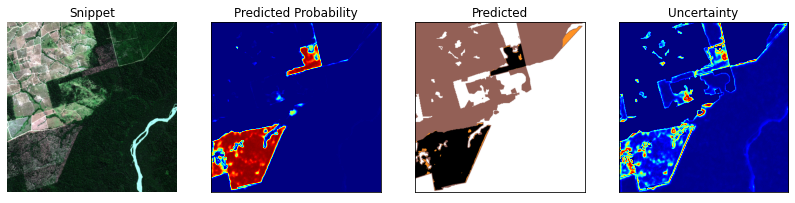

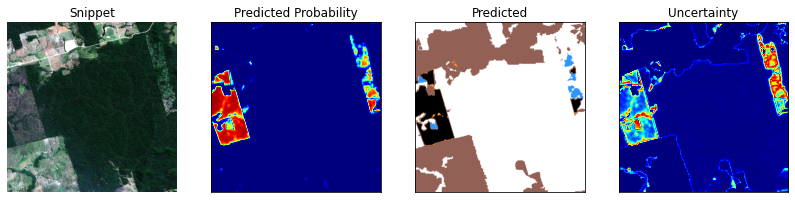

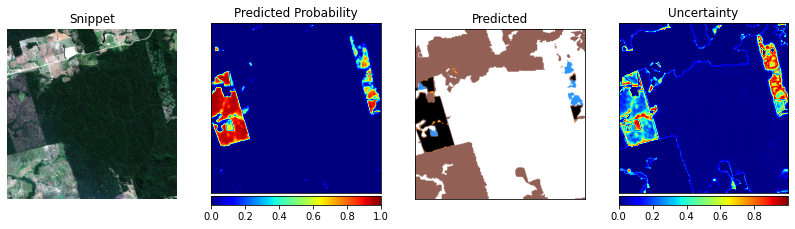

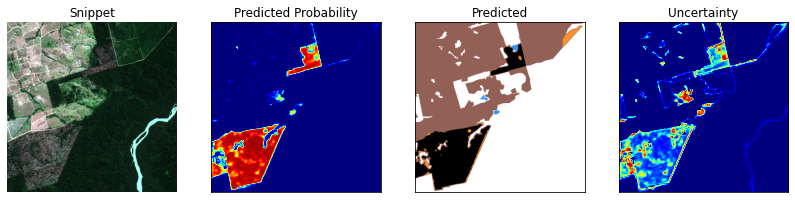

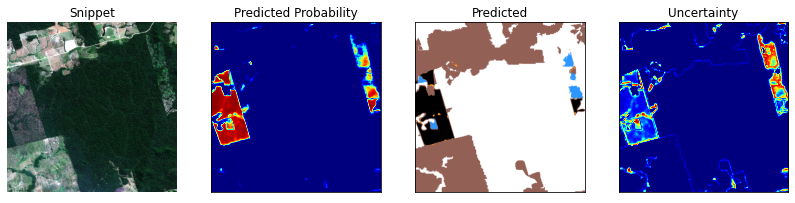

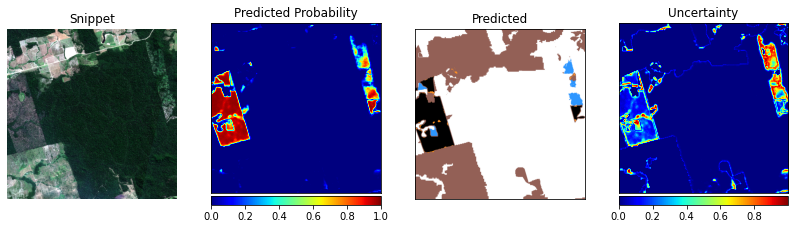

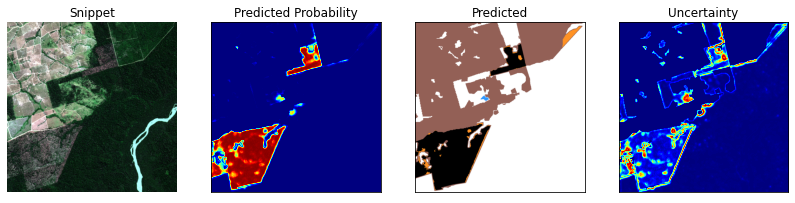

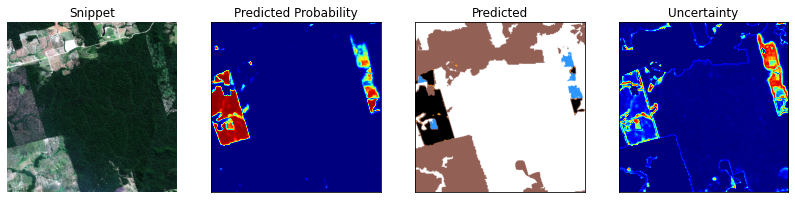

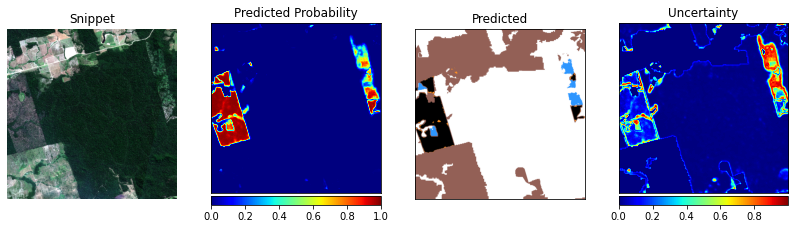

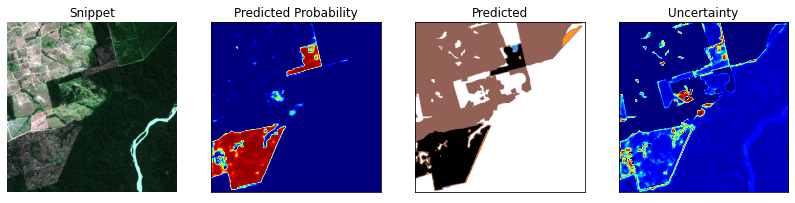

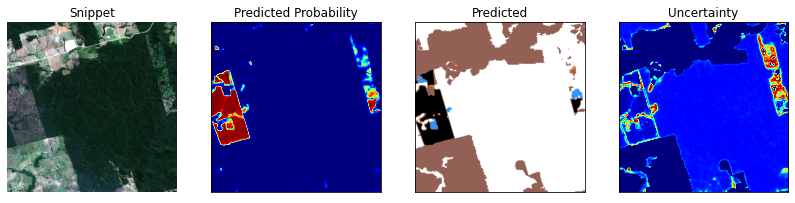

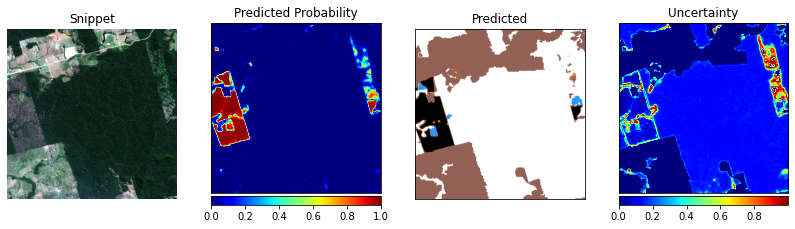

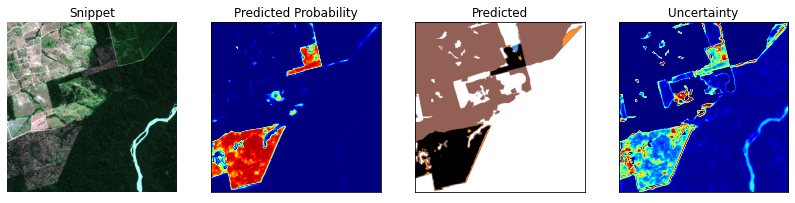

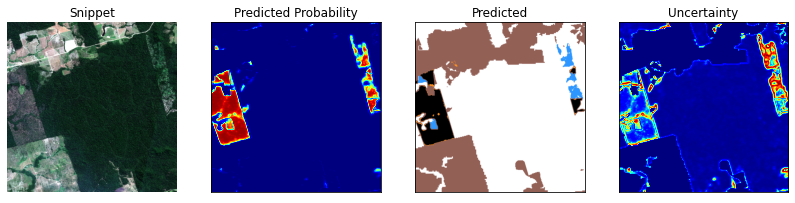

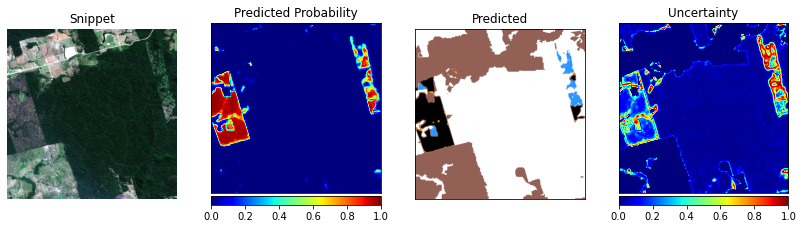

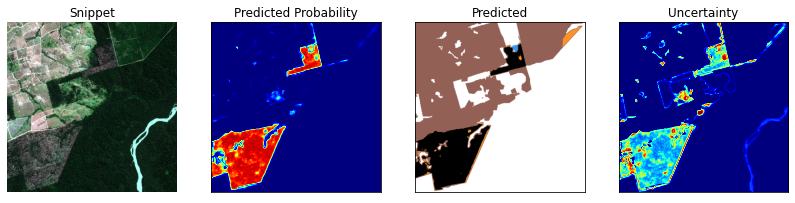

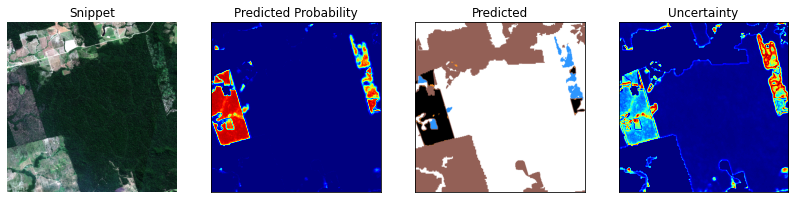

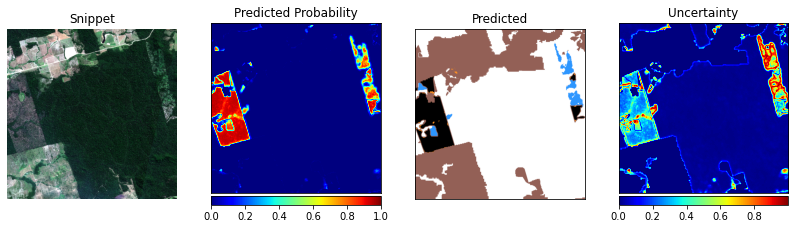

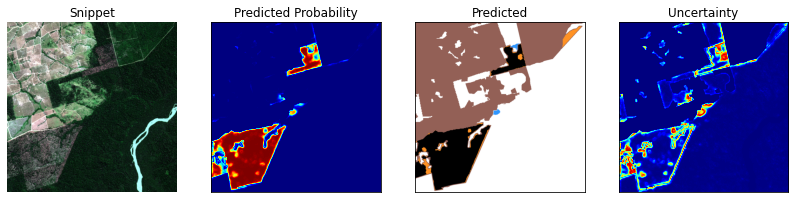

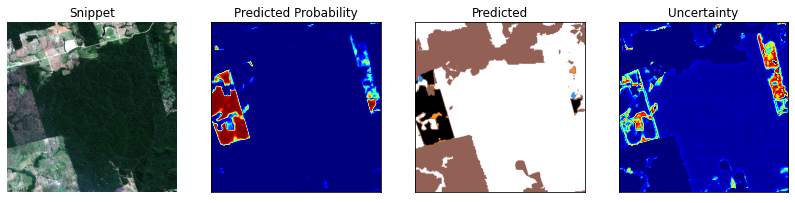

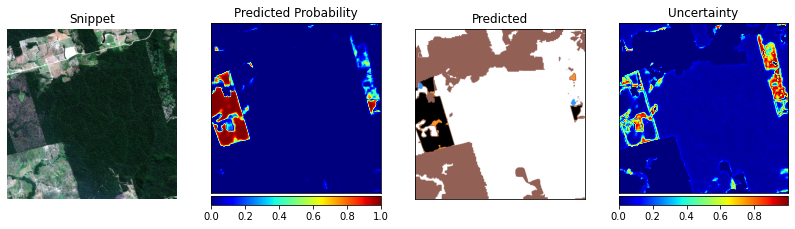

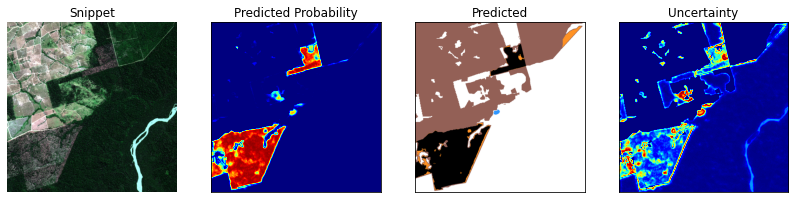

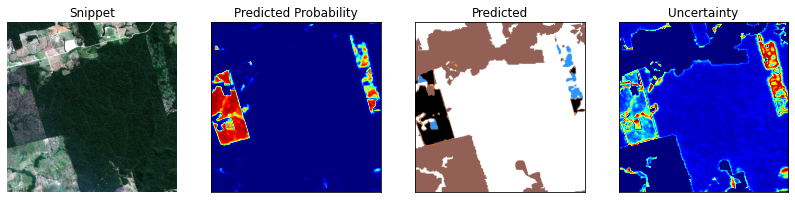

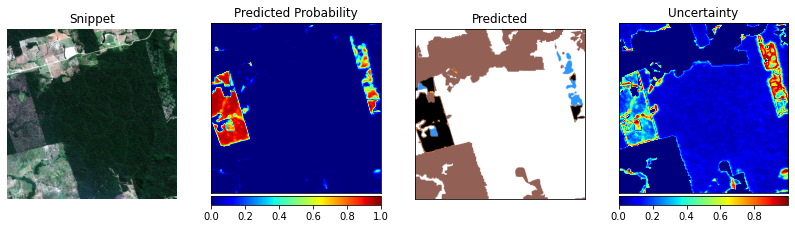

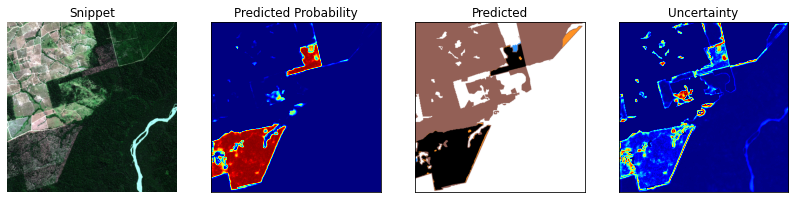

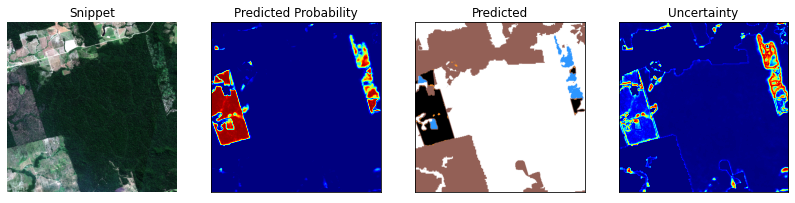

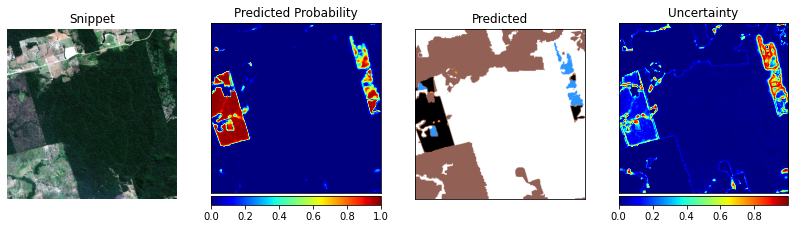

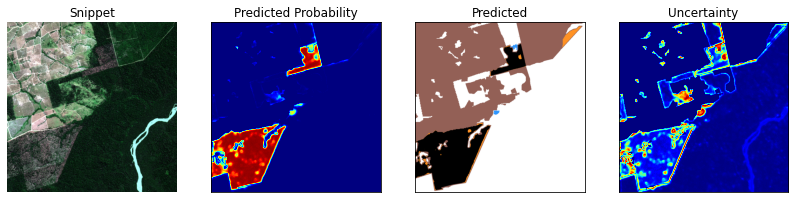

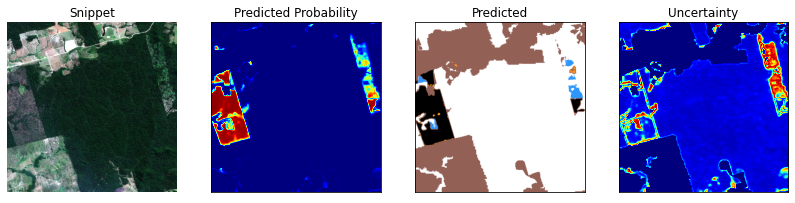

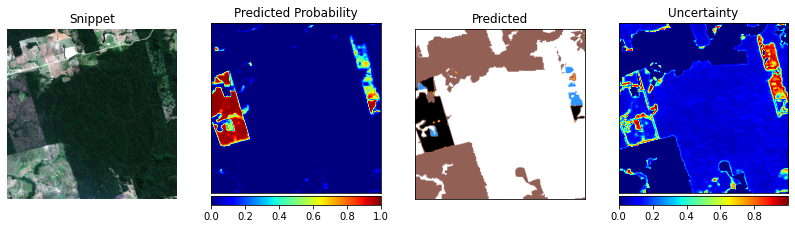

In [8]:
idx = 0
results = []
error_count = 0
while idx < len(exp_ids):
# for experiment_value, exp_id in zip(experiment_values, exp_ids):
    try:
        
        print("Beginning run number {}".format(idx))

        logger = Logger()
        trainer = trainer_class(config, dataset, patchesHandler, logger)

        trainer.defineExperiment(exp_ids[idx])

        trainer.setExperimentPath()
        trainer.createLogFolders()

        trainer.loadDataset()

        # %%
        if config["training"] == True:
            trainer.run()

        # %%
        result = trainer.run_predictor()
        print("Result idx {}: {}".format(idx, result))
        results.append(result)


        with open('log.pkl', 'wb') as f:
            pickle.dump(results, f)
        idx += 1
        print("Grid execution idx: {}".format(idx))
        error_count = 0
    except Exception as e: 
        print(traceback.format_exc())
        error_count += 1
        if error_count > 10:
            sys.exit()
        print("Execution error in idx {}. Retrying...".format(idx))
        continue

In [9]:
trainer.classes_mode

True

In [10]:
print(results)

[{'other_uncertainty_metrics': {'sUEO': 0.36124189824443503, 'ece_score': 0.07641719016982407}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[9.9723417e-01, 1.7180154e-04, 2.5941012e-03],
       [9.9999642e-01, 8.5109003e-12, 3.5710395e-06],
       [9.9999774e-01, 1.3225414e-07, 2.1267140e-06],
       [9.9665856e-01, 3.6329415e-04, 2.9781044e-03],
       [9.9999917e-01, 7.8610569e-08, 7.7309903e-07],
       [9.9973875e-01, 4.0469299e-08, 2.6121672e-04],
       [9.9999201e-01, 1.4115976e-08, 7.9865686e-06],
       [9.7695655e-01, 1.7450954e-07, 2.3043392e-02],
       [9.9998093e-01, 2.0142302e-08, 1.9023149e-05],
       [9.9999845e-01, 7.6997536e-10, 1.5716076e-06]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.32031664, 0.49859148, 0.18109189],
       [0.33163118, 0.4493452 , 0.21902363],
       [0.28337163, 0.5485903 , 0.16803817],
       [0.25466755, 0.55371356, 0.19161883],
    

In [11]:
print(len(results))

10


In [12]:
results[9]

{'other_uncertainty_metrics': {'sUEO': 0.3170325976364059,
  'ece_score': 0.08473384649994727},
 'snippet_poi_results': [{'snippet_id': 0,
   'coords': [550, 550],
   'reference': 0,
   'predicted': array([[9.9551290e-01, 2.1834057e-04, 4.2687594e-03],
          [9.9999952e-01, 7.9250874e-08, 3.7967749e-07],
          [9.9959975e-01, 1.6068608e-04, 2.3961959e-04],
          [9.9233222e-01, 3.4853606e-04, 7.3192772e-03],
          [9.9999988e-01, 2.1992945e-09, 1.3804714e-07],
          [9.9543458e-01, 7.4053467e-05, 4.4914051e-03],
          [9.9984467e-01, 2.9082333e-08, 1.5534279e-04],
          [9.9999940e-01, 2.0066381e-10, 6.1478164e-07],
          [1.0000000e+00, 9.4605855e-13, 3.0008678e-08],
          [9.9958521e-01, 4.6567106e-09, 4.1474507e-04]], dtype=float32)},
  {'snippet_id': 0,
   'coords': [210, 610],
   'reference': 1,
   'predicted': array([[0.359657  , 0.40804031, 0.23230265],
          [0.40404314, 0.38798448, 0.20797236],
          [0.33321896, 0.45696196, 0.209819

In [13]:
trainer.f1

85.61

In [14]:
print(trainer.f1)

85.61
